Notebook to explore the ocurrence per year of specific concepts connected with left and right ideology.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.data.utils import string_to_list as st
import scienceplots
plt.style.use(['science', 'ieee', 'grid', 'vibrant', 'no-latex'])

In [2]:
# Read and adjust data.
df = pd.read_csv('../data/all-data-clean-tokenized.csv')

In [ ]:
# Create year feature.
df['year'] = pd.to_datetime(df.fecha, format='%Y-%m-%d').dt.year

# Fix the problem with lists in pandas columns.
df['phrases'] = df['phrases'].apply(st)

# Filter out 2023.
df = df.loc[df['year'] < 2023]

In [ ]:
df.head(2)

legislatura       fecha                                  objeto_iniciativa  \
0            7  2000-04-25  Propuesta de candidato a la Presidencia del Go...   
1            7  2000-04-25  Propuesta de candidato a la Presidencia del Go...   

  numero_expediente                       autores nombre_sesion  \
0   080/000001/0000  Juan Carlos I, Rey de España         Pleno   
1   080/000001/0000  Juan Carlos I, Rey de España         Pleno   

                                       orador  \
0  Anasagasti Olabeaga, Iñaki Mirena (GV-PNV)   
1                Frutos Gras, Francisco (GIU)   

                                          enlace_pdf political_group  \
0  https://www.congreso.es:443/public_oficiales/L...             PNV   
1  https://www.congreso.es:443/public_oficiales/L...              IU   

                                                text  \
0  Gracias, señora presidenta. Esta investidura n...   
1  Señora presidenta, seño- ras y señores diputad...   

                                          clean_text  \
0  ['investidura', 'ver', 'cuatro', 'años', 'aque...   
1  ['candidato', 'primer', 'lugar', 'lógico', 're...   

                                             phrases  year  
0  [investidura, ver, cuatro_años, aquella, oport...  2000  
1  [candidato, primer_lugar, lógico, reconocimien...  2000

### Old approach: term-based

In [9]:
def get_occurrence(terms: list, corpus: pd.DataFrame) -> pd.DataFrame:

    years = range(2000, 2023)
    occurrences = pd.DataFrame(index=years)
    total_interventions = corpus.loc[corpus['year'].isin(years)].groupby('year').count()

    for term in terms:
        mask = corpus.phrases.apply(lambda x: term in x)
        occurrence = corpus[mask].groupby(['year']).count()
        occurrence = occurrence['phrases'] / total_interventions['phrases'] * 100

        occurrence = occurrence.sort_index()
        occurrences[term] = occurrence

    return occurrences

def plot_occurrence(terms: list, occurrences: pd.DataFrame):
    fig, ax = plt.subplots()

    for term in terms:
        ax.plot(occurrences[term], label=term)

    ax.set_xticks(range(2000, 2023, 2))
    ax.set_xticklabels(range(2000, 2023, 2), rotation=60)  # , ha='right')
    ax.grid(alpha=.3)

    # remove tick marks
    ax.xaxis.set_tick_params(size=0)
    ax.yaxis.set_tick_params(size=0)

    # Titles
    ax.set_xlabel('Year')
    ax.set_ylabel(f'% of interventions including the term')
    ax.set_title('Occurrence of terms in the corpus')
    ax.title.set_weight('bold')

    ax.legend(fontsize=5)

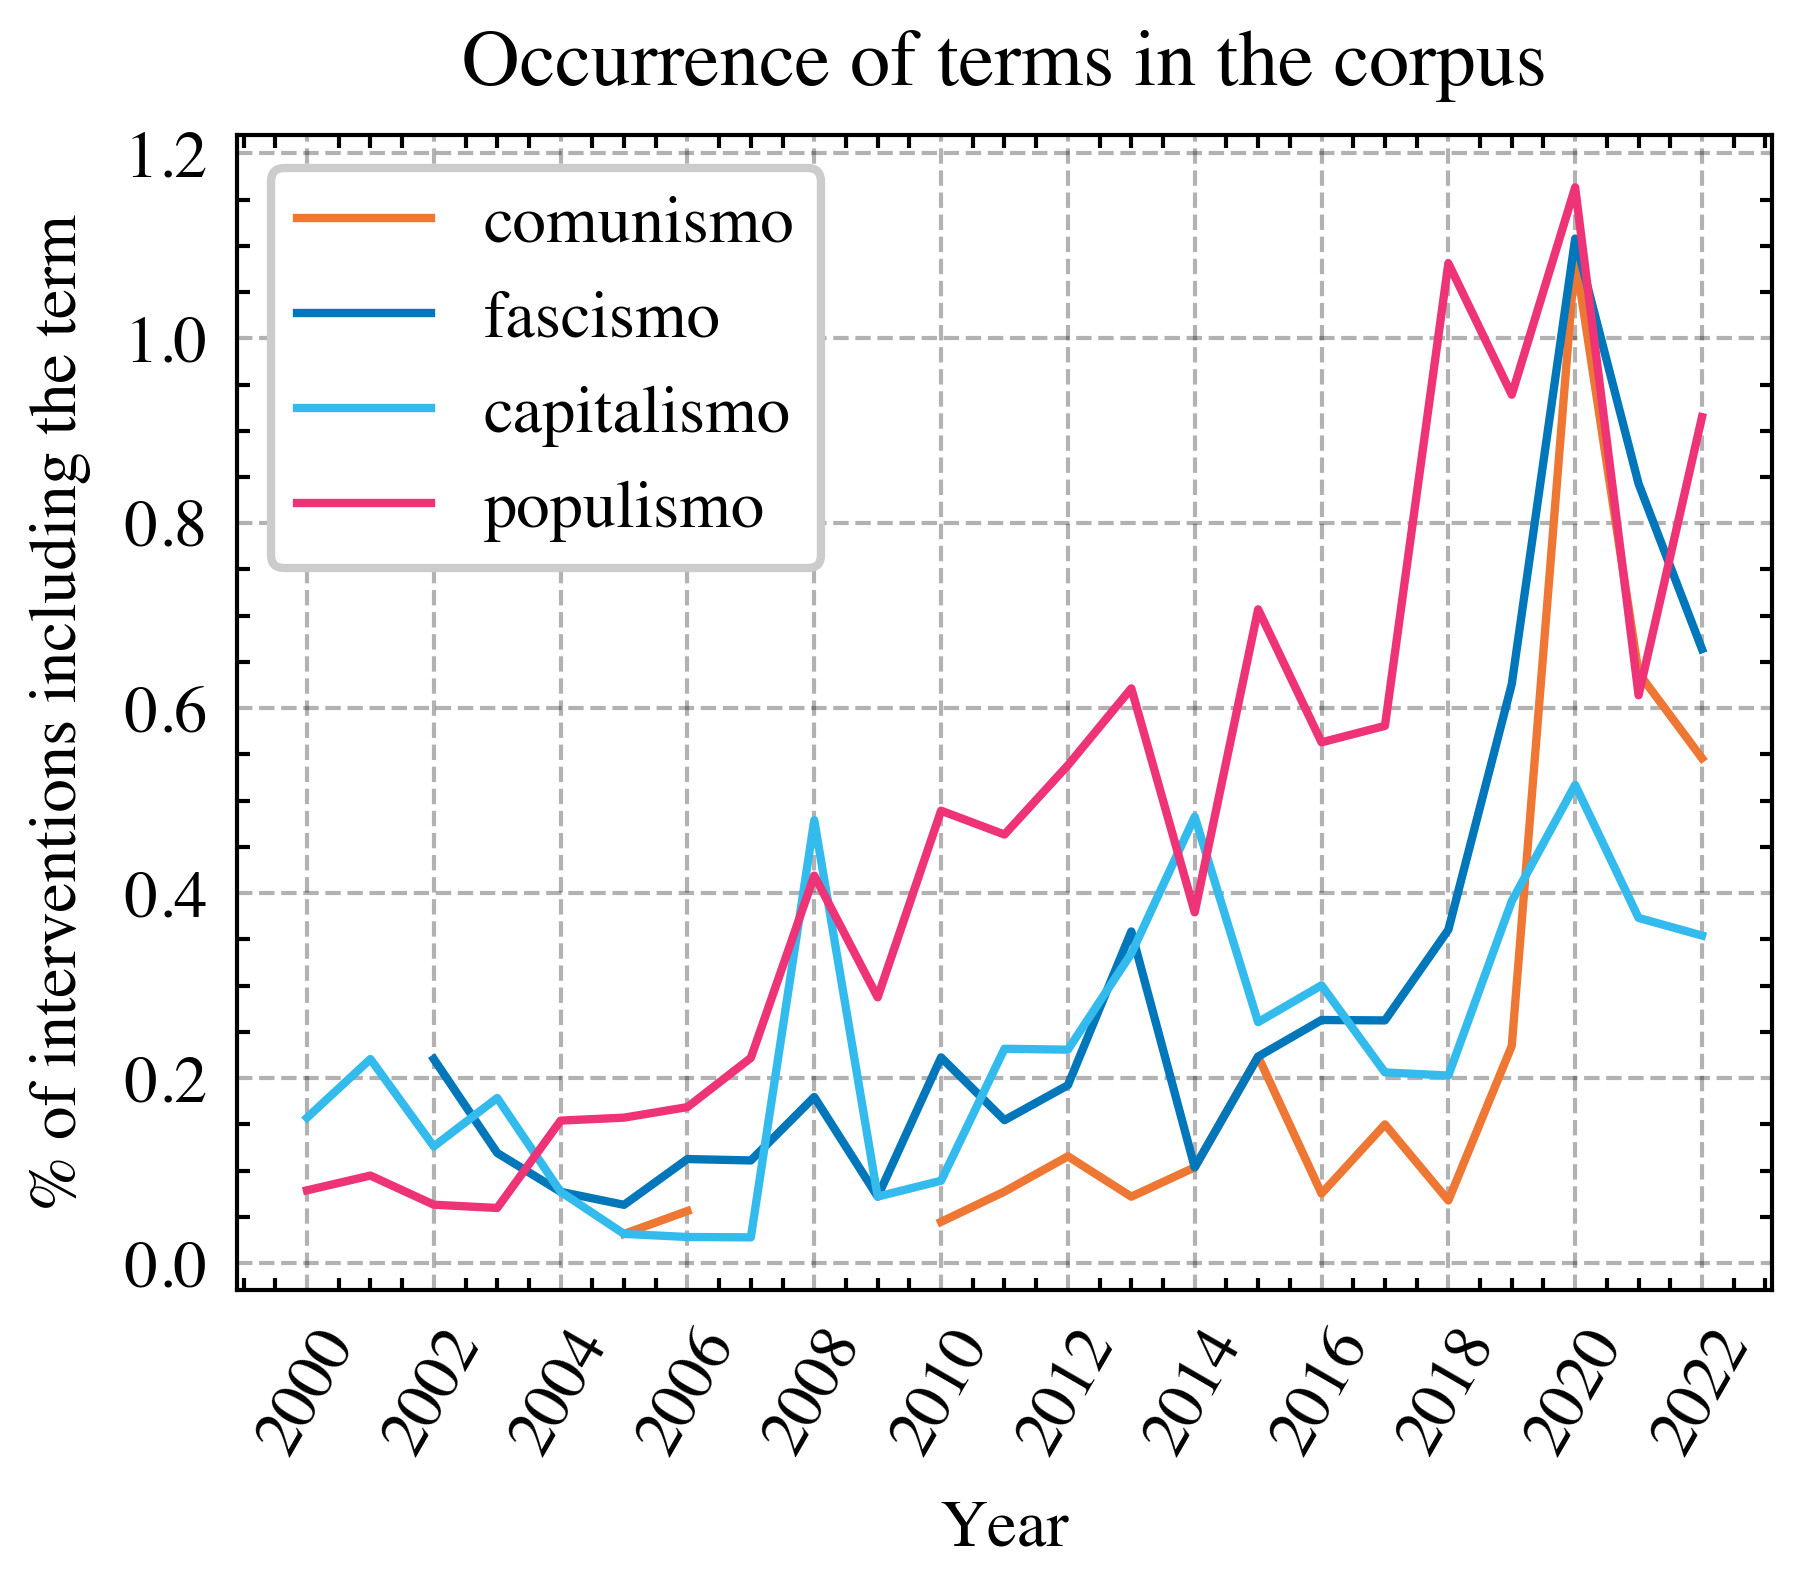

In [58]:
terms = ['comunismo', 'fascismo', 'capitalismo', 'populismo']
occurrences = get_occurrence(terms, df)
plot_occurrence(terms, occurrences)


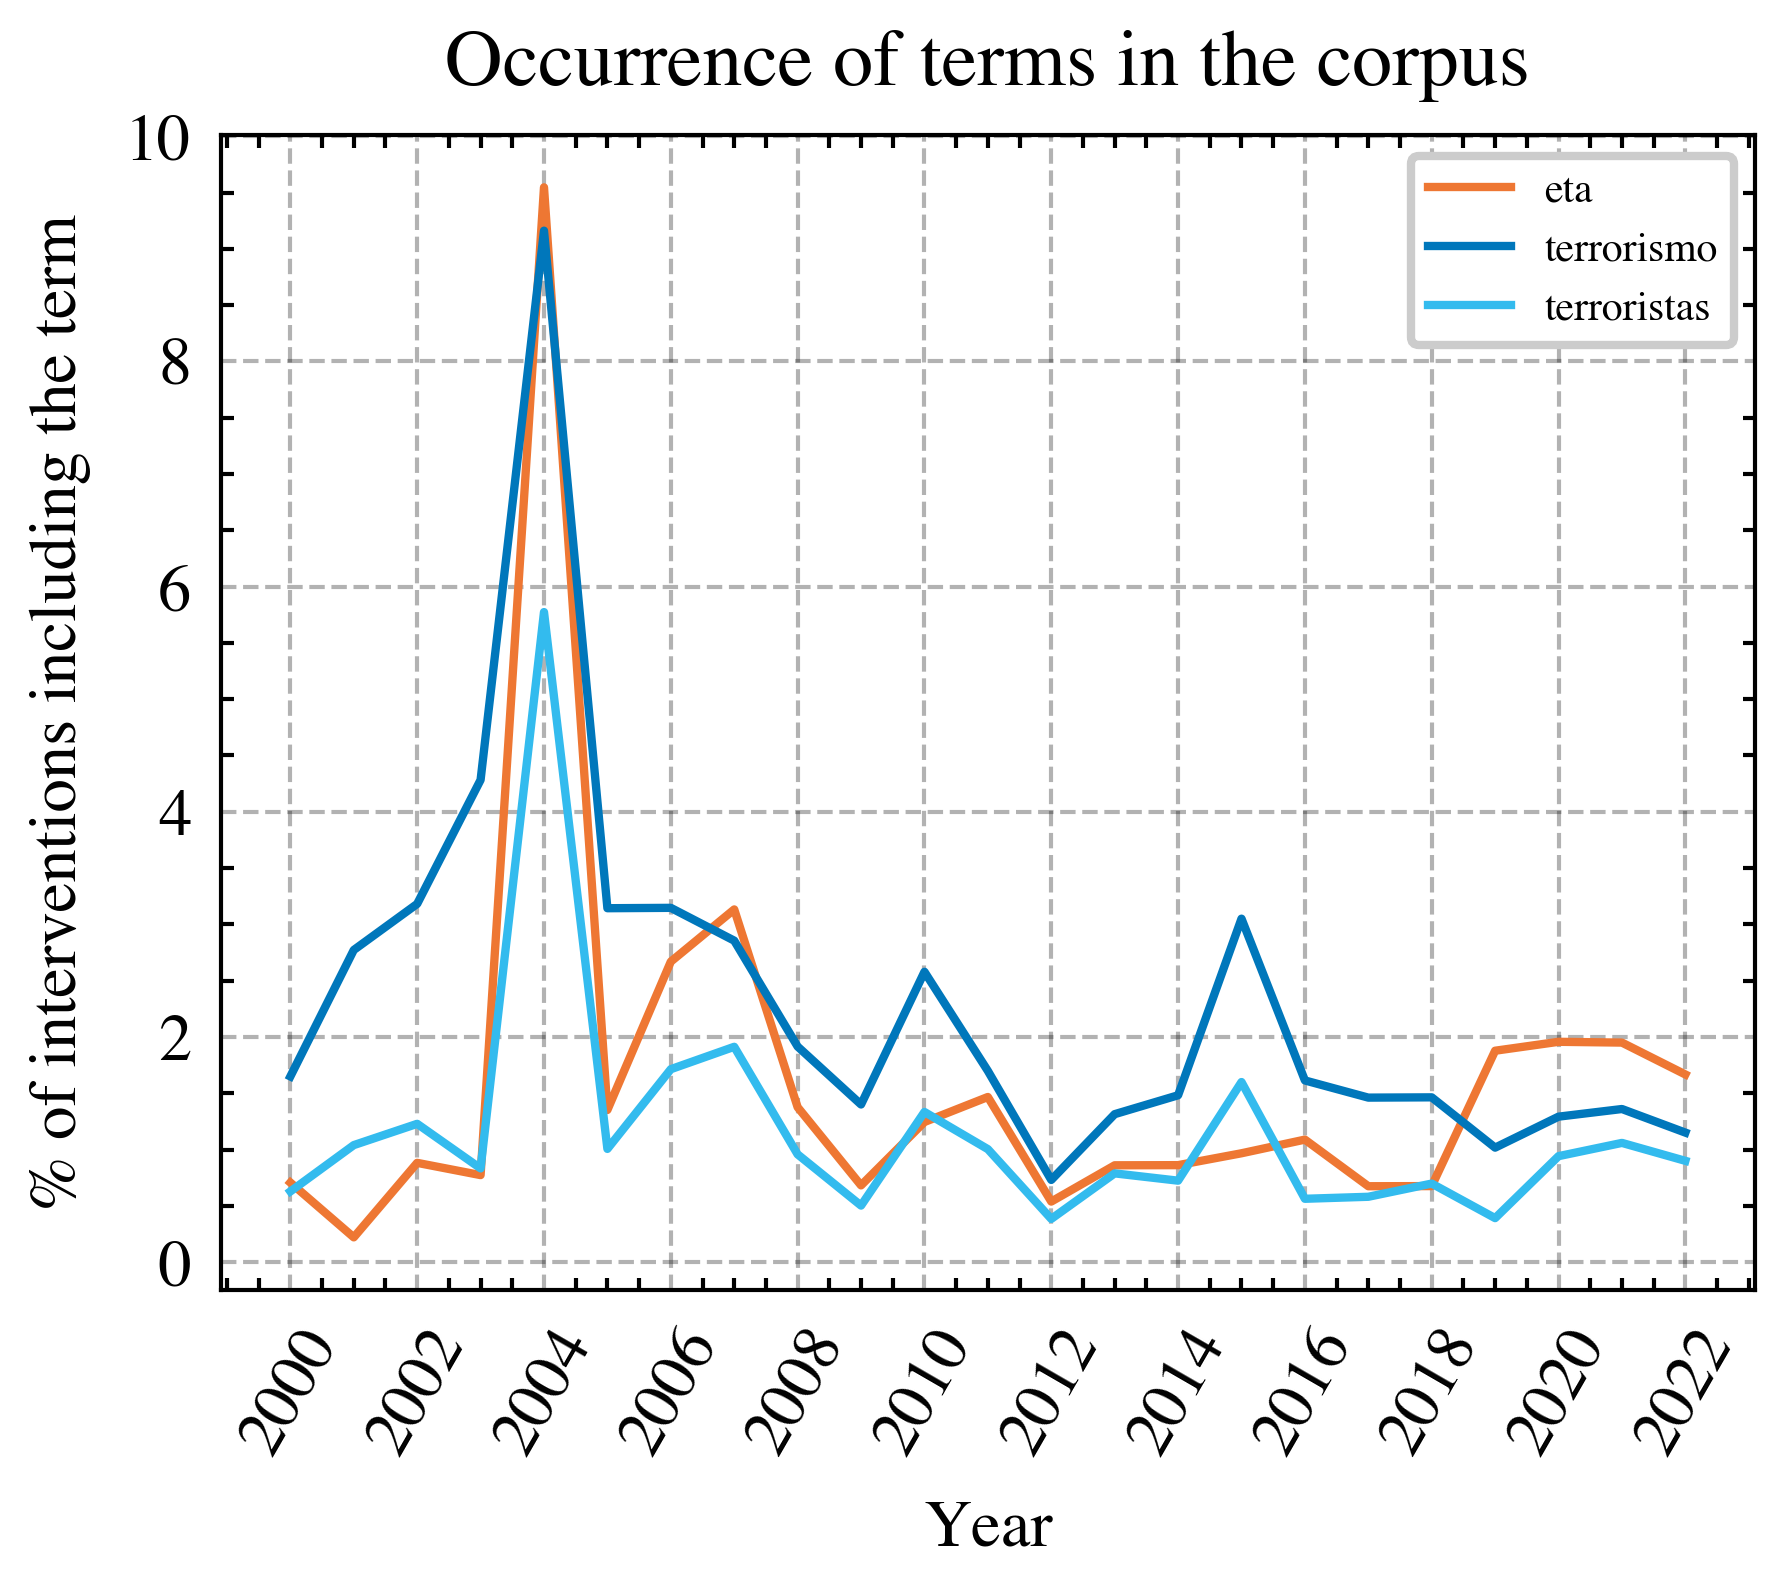

In [14]:
terms = ['eta', 'terrorismo', 'terroristas']
occurrences = get_occurrence(terms, df)
plot_occurrence(terms, occurrences)

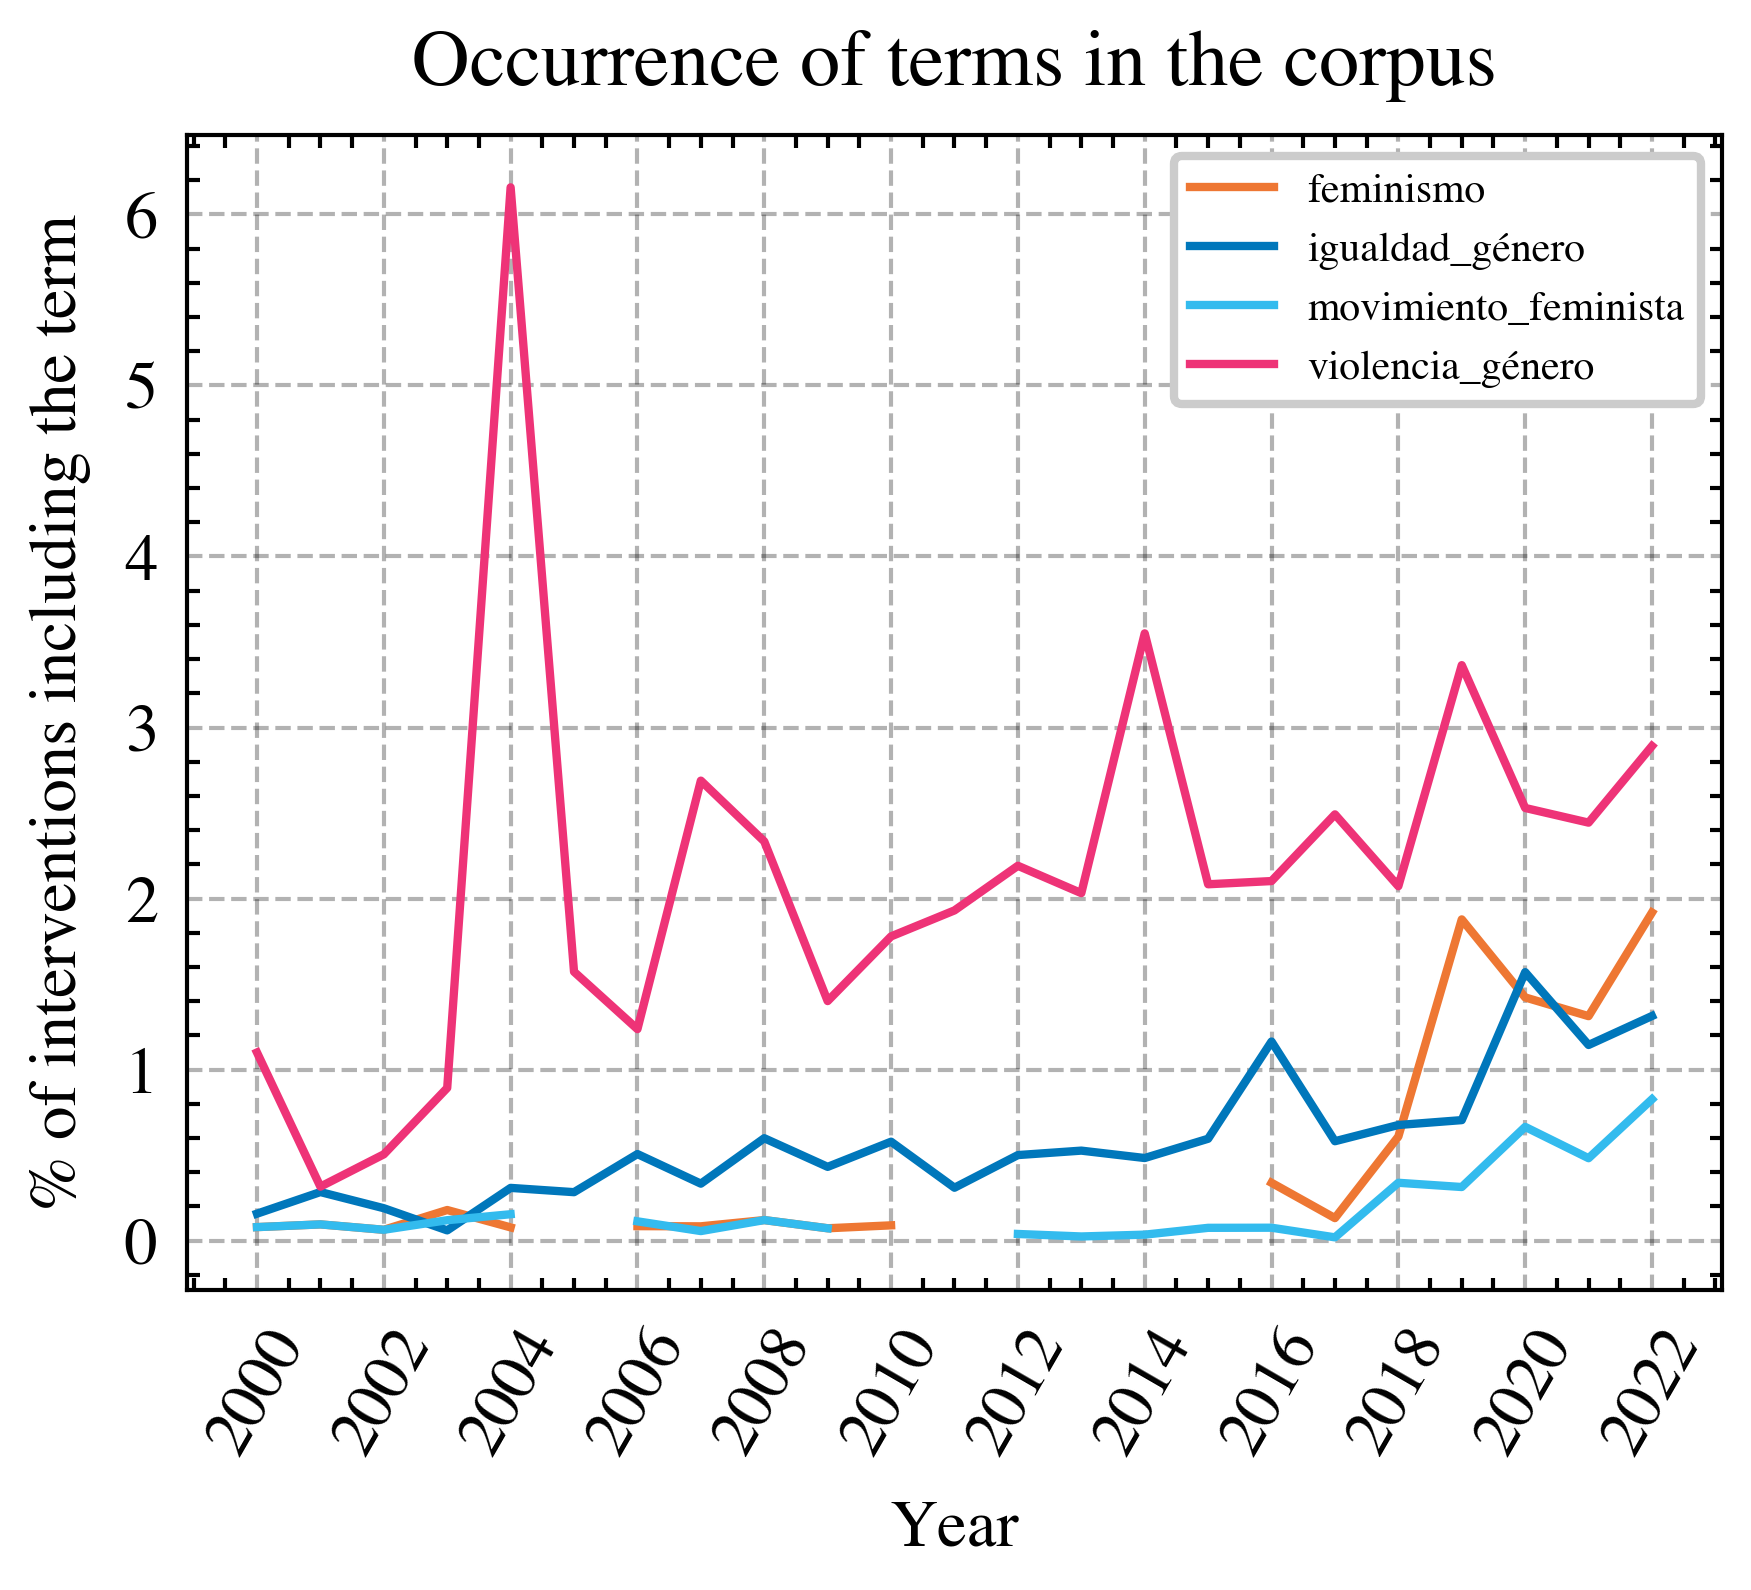

In [11]:
terms = ['feminismo', 'igualdad_género', 'movimiento_feminista', 'violencia_género']
occurrences = get_occurrence(terms, df)
plot_occurrence(terms, occurrences)

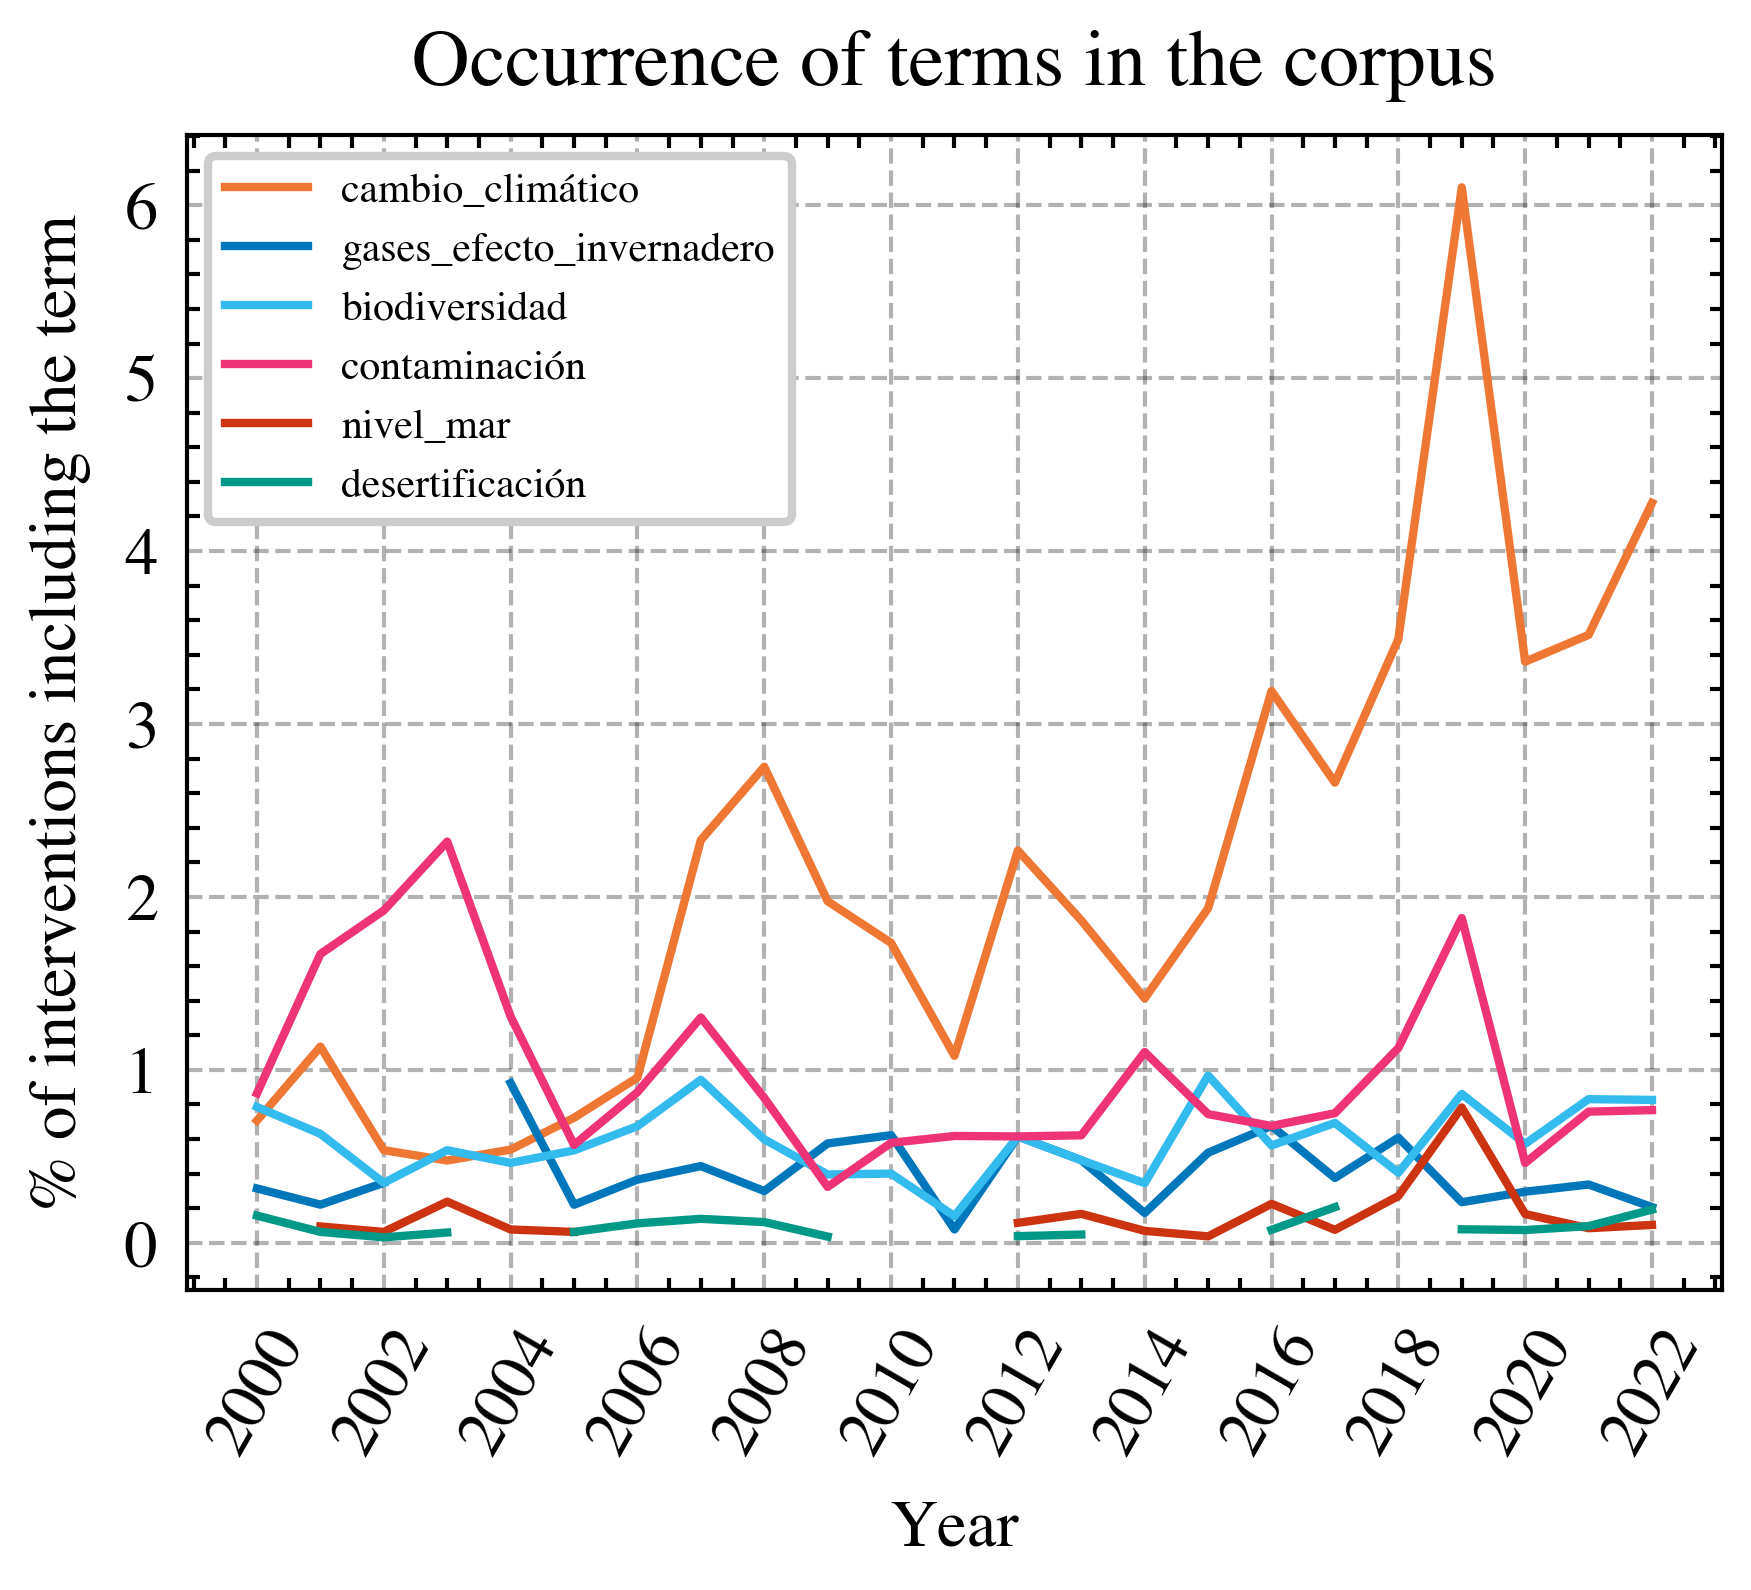

In [12]:
terms = ['cambio_climático', 'gases_efecto_invernadero', 'biodiversidad', 
         'contaminación', 'nivel_mar', 'desertificación']
occurrences = get_occurrence(terms, df)
plot_occurrence(terms, occurrences)

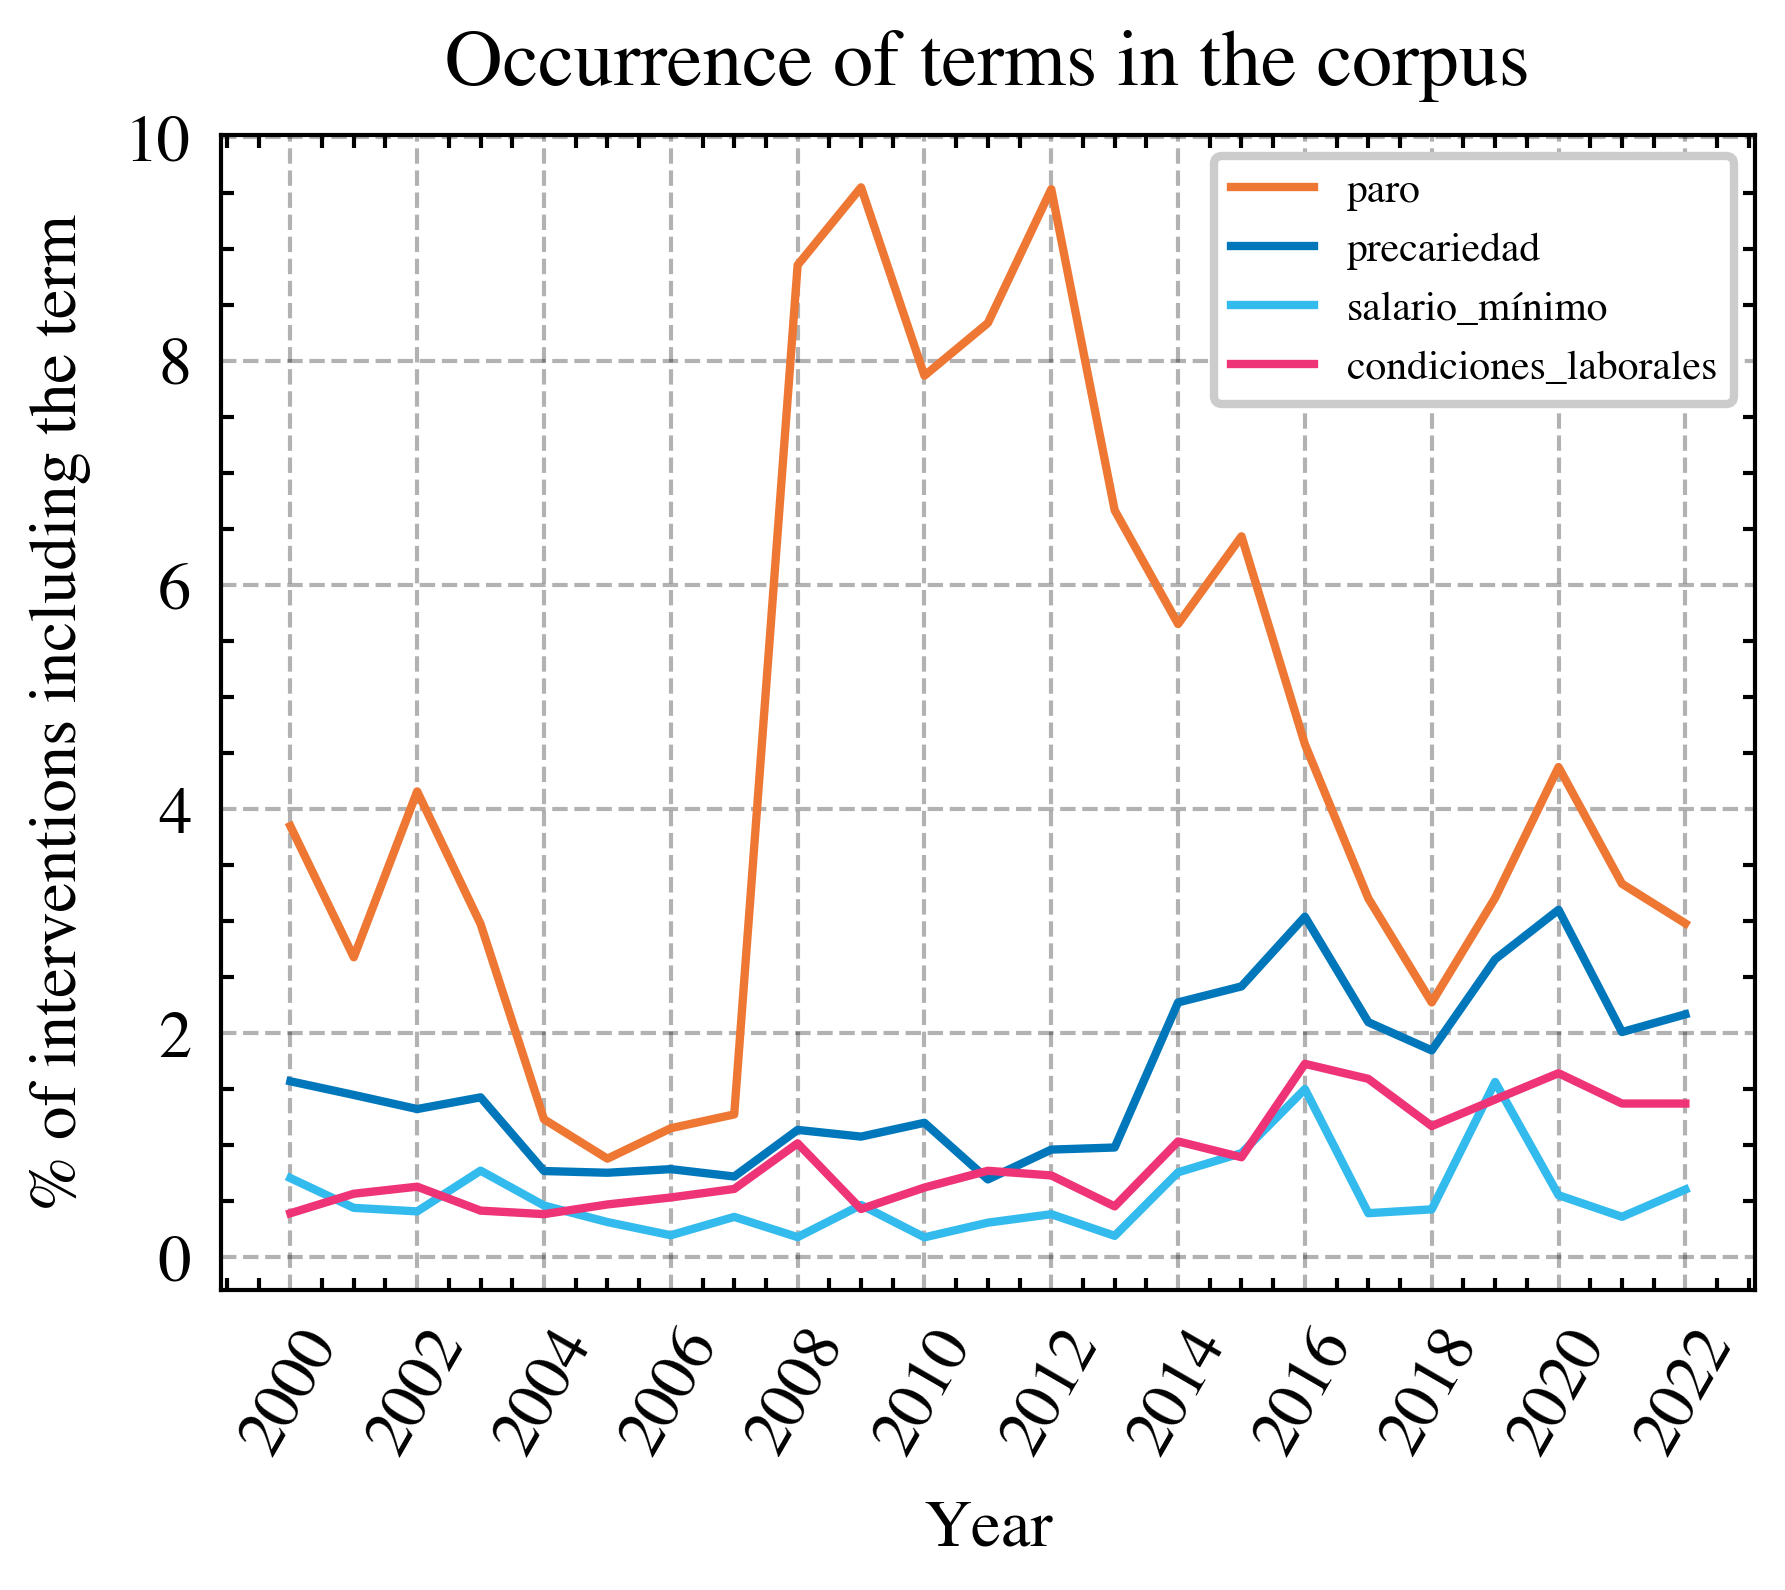

In [13]:
terms = ['paro', 'precariedad', 'salario_mínimo', 'condiciones_laborales']
occurrences = get_occurrence(terms, df)
plot_occurrence(terms, occurrences)

### New approach: topic-based

In [6]:
# Importing the embeddings model.
import gensim

model = gensim.models.doc2vec.Doc2Vec.load('../models/party_lvl-dm-m-d50-n5-w20-mc5-s0,001-t8-e20-bigrams-2tags-reduced-fixed-data.mdl')

I selected a few topics to analyse their occurrence in parliament throughout time. Those topics were:

- feminism, equality and women's rights.
- lgtbi rights: gay marriange, gender self-determination, etc.
- unemployment, labour rights, precariousness.
- Planetary boundaries: climate change, pollution, biodiversity, desertification, drought.
- Catalan independence movement.
- Terrorism, mainly domestic terrorism (ETA).
- Economy: economic crisis, debt crisis, economic growth, housing bubble.
- Desahucios, housing rights, housing.

To analyse these topics, we calculate topic occurrence accross the 22 years of available data. To choose the terms that we will include for each topic, we find the most similar terms for each topic using the embeddings model.



#### Topic assignment

In [341]:
model.wv.most_similar(model.wv['abaratar_despido'], topn=10)

[('abaratar_despido', 1.0),
 ('reforma_laboral', 0.7637096047401428),
 ('salarios_bajos', 0.7555750608444214),
 ('facilita_despido', 0.7332583665847778),
 ('despido', 0.7315265536308289),
 ('abaratamiento_despido', 0.7279714941978455),
 ('bajada_salarios', 0.7207762002944946),
 ('bajar_salarios', 0.7204266786575317),
 ('trabajadores_precarios', 0.7153106331825256),
 ('subida_salario_mínimo', 0.7129805088043213)]

In [7]:
feminism = ['movimiento_feminista', 'lucha_feminista', 'violencias_sexuales', 'violencias_machistas', 'feministas', 'feminismo', 'feminista', 'movimientos_feministas', 'abolicionistas', 'derechos_sexuales',
            'derechos_feministas', 'violencia_machista', 'machismo', 'reproductivos_mujeres', 'patriarcal', 'patriarcado', 'violencia_género', 'pacto_violencia_género', 'libertad_sexual', 'abuso_violación',
            'derechos_sexuales_reproductivos', 'aborto', 'interrupción_voluntaria_embarazo', 'salud_sexual_reproductiva_interrupción', 'abortar', 'interrupción_embarazo', 'derecho_aborto', 'interrumpir_embarazo',
            'aborto_legal_seguro', 'catorce_semanas', 'misógina', 'machista', 'igualdad_género', 'mujeres_feministas', 'misoginia', 'perspectiva_feminista', 'pobreza_menstrual', 'perspectiva_género', 'sexismo',
            'brecha_género', 'interrumpir_voluntariamente_embarazo', 'salud_sexual_reproductiva_interrupción', 'puertas_clínicas', 'embarazo_deseado', 'abortistas', 'provida', 'abortar_clínicas', 'practicar_abortos',
            'aborten', 'violadas', 'acai', 'práctica_abortos', 'ive']

lgtbi = ['trans', 'lgtbi', 'derechos_personas_lgtbi', 'lgtb', 'personas_lgtbi', 'personas_trans', 'colectivo_lgtbi', 'intersexuales',
         'gay', 'comunidad_lgtbi', 'homofobia', 'transexuales', 'derechos_colectivo_lgtbi', 'lesbianas_gays_transexuales_bisexuales',
         'igualdad_efectiva_personas_trans', 'lucha_homofobia', 'felgtb', 'orgullo_lgtbi', 'derechos_lgtbi', 'motivos_orientación_sexual',
         'homófobos', 'discriminación_orientación_sexual', 'diversidad_sexual', 'orientación_sexual_identidad_género', 'gays_lesbianas',
         'transgénero', 'derechos_homosexuales', 'igualdad_trato_discriminación', 'mujeres_trans', 'mujeres_transexuales', 'colectivos_lgtbi',
         'mujeres_lesbianas', 'identidad_género', 'intersexual', 'personas_homosexuales', 'homófoba', 'homófobas', 'homosexualidad',
         'orgullo_gay', 'matrimonio_gay', 'bisexual', 'matrimonio_igualitario', 'matrimonio_homosexual', 'mismo_sexo', 'parejas_homosexuales',
         'identidad_sexual', 'independencia_orientación_sexual', 'lesbianas', 'colectivo_gays_lesbianas']

labour = ['precariedad', 'empleos_precarios', 'empleo_precario', 'bajos_salarios', 'precario', 'trabajadores_pobres', 'salario_mínimo', 'salario_mínimo_interprofesional', 'contrarreforma_laboral',
          'precariedad_laboral', 'precariedad_temporalidad', 'precariedad_inestabilidad', 'precarización', 'acabar_precariedad', 'jornada_completa', 'horas_extra', 'modelo_relaciones_laborales',
          'despidos', 'despido', 'salarios_miseria', 'mercado_trabajo', 'derechos_laborales', 'subempleo', 'contratos_temporales', 'sueldo', 'mileuristas', 'derogación_reforma_laboral',
          'precariedad_pobreza', 'bajada_salarios', 'despido', 'interinos_interinas', 'trabajo_precario', 'desempleo_precariedad', 'subir_salario_mínimo_interprofesional', 'devaluación_salarial',
          'salarios_bajos', 'salarios_dignos', 'trabajos_temporales', 'contrato_temporal', 'salarios', 'alta_tasa_temporalidad', 'subida_salario_mínimo', 'reforma_laboral', 'facilita_despido',
          'contratación_laboral', 'paro', 'desempleo', 'tasa_paro', 'empleo', 'destrucción_empleo', 'millones_parados', 'hogares_miembros_paro', 'subida_salario_mínimo_interprofesional',
          'empleo_destruido', 'tasa_paro_juvenil', 'paro_juvenil', 'desempleo_juvenil', 'crear_empleo', 'millón_parados', 'tasa_desempleo', 'abaratar_despido', 'despidos_colectivos',
          'empleo_precario', 'paro_larga_duración', 'creando_empleo', 'condiciones_laborales', 'derechos_trabajadores', 'libertad_sindical', 'congelar_salario_mínimo_interprofesional',
          'salarios', 'trabajadoras_hogar', 'trabajadoras_trabajadores', 'relaciones_laborales', 'estatuto_trabajadores', 'negociación_colectiva', 'reformas_laborales', 'trabajadores_precarios']

planet = ['planeta', 'recursos_naturales', 'cambio_climático', 'calentamiento_global', 'consecuencias_cambio_climático', 'océanos', 'calentamiento_planeta', 
          'combustibles_fósiles', 'justicia_climática', 'nivel_mar', 'climática', 'lucha_cambio_climático', 'preservando_medio_ambiente', 'efectos_cambio_climático',
          'crisis_climática', 'deforestación', 'amenaza_cambio_climático', 'aumento_temperatura', 'lucha_desertificación', 'pérdida_biodiversidad', 'contaminación_aire',
          'deterioro_medio_ambiente', 'emergencia_climática', 'reducción_gases_efecto_invernadero', 'frente_cambio_climático', 'cambio_climático_transición_energética', 
          'emisiones_gases_efecto_invernadero', 'adaptación_cambio_climático', 'gases_efecto_invernadero', 'kioto', 'ipcc', 'combustibles_fósiles', 'efecto_invernadero', 
          'luchar_cambio_climático', 'reducir_emisiones',  'desertificación', 'medio_ambiente', 'climático', 'dióxido_carbono', 'disminución_emisiones', 'acuerdo_parís', 
          'impactos_cambio_climático', 'protocolo_kioto', 'biodiversidad', 'ecosistemas', 'protección_biodiversidad', 'conservación_biodiversidad', 'espacios_naturales',
          'bosques', 'parque_nacional', 'red_natura', 'doñana', 'conservación_especies', 'especies_amenazadas', 'conservación_naturaleza', 'peligro_extinción', 'medioambiente',
          'hábitats', 'diversidad_biológica', 'medioambiental', 'organizaciones_ecologistas', 'reforestación','ecologismo', 'sequía', 'inundaciones', 'recursos_hídricos',
          'lluvias_torrenciales', 'contaminación_atmosférica', 'mala_calidad_aire', 'contaminación_plásticos', 'ozono', 'partículas_suspensión', 'capa_ozono', 'dióxido_nitógeno',
          'contaminación_ciudades']

catalan = ['independentista', 'estatuto_autonomía_cataluña', 'estatuto_cataluña', 'separatista', 'independentistas', 'referéndum_autodeterminación', 'declaración_unilateral', 
           'referéndum_independencia', 'autodeterminación', 'derecho_autodeterminación', 'secesionistas', 'secesión', 'estatut', 'estatut_catalunya', 'estatuto_autonomía_cataluña',
           'sentencia_estatut', 'independentismo', 'socios_separatistas', 'líderes_separatistas', 'separatistas_catalanes', 'procés', 'separatismo_catalán', 'referendum_independentista',
           'nacionalismo_catalán']

terrorism = ['terrorism','lucha_terrorismo', 'combatir_terrorismo', 'terrorista', 'violencia_terrorista', 'lucha_antiterrorista', 'terrorismo_eta', 'banda_terroristas_eta', 'eta', 'lucha_eta',
             'atentados', 'banda_terrorista', 'eta_eta', 'delitos_terrorismo', 'atentados_terroristas', 'víctimas_terrorismo',  'banda_terrorista_eta', 'organización_terrorista', 'presos_eta', 
             'eta_batasuna', 'acercamiento_presos', 'proetarras', 'eta_mataba', 'batasuna_eta', 'asesinos_etarras', 'apología_terrorismo', 'kale_borroka', 'bilduetarras', 'amigos_eta', 'filoetarras',
             '11m']

economy = ['crisis_económica', 'situación_económica', 'recesión', 'estímulo_economía', 'saneando_cuentas_públicas', 'parón_actividad', 'destrucción_puestos_trabajo', 
           'recesión_económica', 'crisis_deuda_soberana', 'déficit_heredado', 'ruina_económica', 'colapso_financiero', 'caída_producto_interior_bruto', 'recortes_austeridad', 
           'gravísima_crisis_económica', 'salir_crisis_económica', 'economía_española_crecerá', 'recesión_paro', 'pib', 'producto_interior_bruto', 'desequilibrio_presupuestario', 
           'crecimiento_pib', 'ratio_deuda_pública', 'saldo_balanza_comercial', 'inversión_pública', 'recuperación_económica', 'crecimiento_económico', 'consolidación_fiscal', 
           'economía_española', 'reactivar_economía', 'recesión_económica', 'motor_crecimiento']


housing = ['burbuja_inmobiliaria', 'boom_inmobiliario', 'banco_malo', 'vivienda', 'acceso_viviendia', 'especulación_inmobiliaria', 'especulación', 'hipotecas_subprime', 'hipotecas_basura', 
           'vivienda_digna', 'vivienda_alquiler', 'derecho_vivienda_digna', 'alquiler_viviendas', 'vivienda_alquiler', 'alquileres', 'casas_vacías', 'mercado_alquiler', 'desahucios', 'viviendas_vacías',
           'grandes_tenedores', 'arrendamientos_urbanos', 'alternativa_habitacional', 'inquilinos', 'okupación', 'liberalización_suelo', 'precios_alquiler', 'ejecuciones_hipotecarias', 'lanzamientos', 'dación_pago',
           'desahucio', 'dación_pago_alquiler', 'pérdida_vivienda', 'cláusulas_suelo', 'parque_viviendas_vacías', 'drama_desahucios', 'desahuciar', 'pah', 'desalojos_forzosos', 'plataforma_afectados_hipoteca',
           'alquiler_social', 'familias_hipotecadas']

In [4]:
# Read and adjust data.
df = pd.read_csv('../data/all-data-clean-tokenized.csv')

# Create year, month and year-month features.
df['year'] = pd.to_datetime(df.fecha, format='%Y-%m-%d').dt.year
df['year-month'] = pd.to_datetime(df.fecha,
                                  format='%Y-%m-%d').dt.strftime('%Y-%m')

# Fix the problem with lists in pandas columns.
df['phrases'] = df['phrases'].apply(st)

In [5]:
corpus = df

#### LGBTQ+ Rights

In [350]:
mask = corpus.phrases.apply(lambda x: any(term for term in lgtbi if term in x))
occurrence = corpus[mask].groupby(['year']).count()['phrases']
totals = corpus.groupby(['year']).count()['phrases']
perc = occurrence / totals * 100

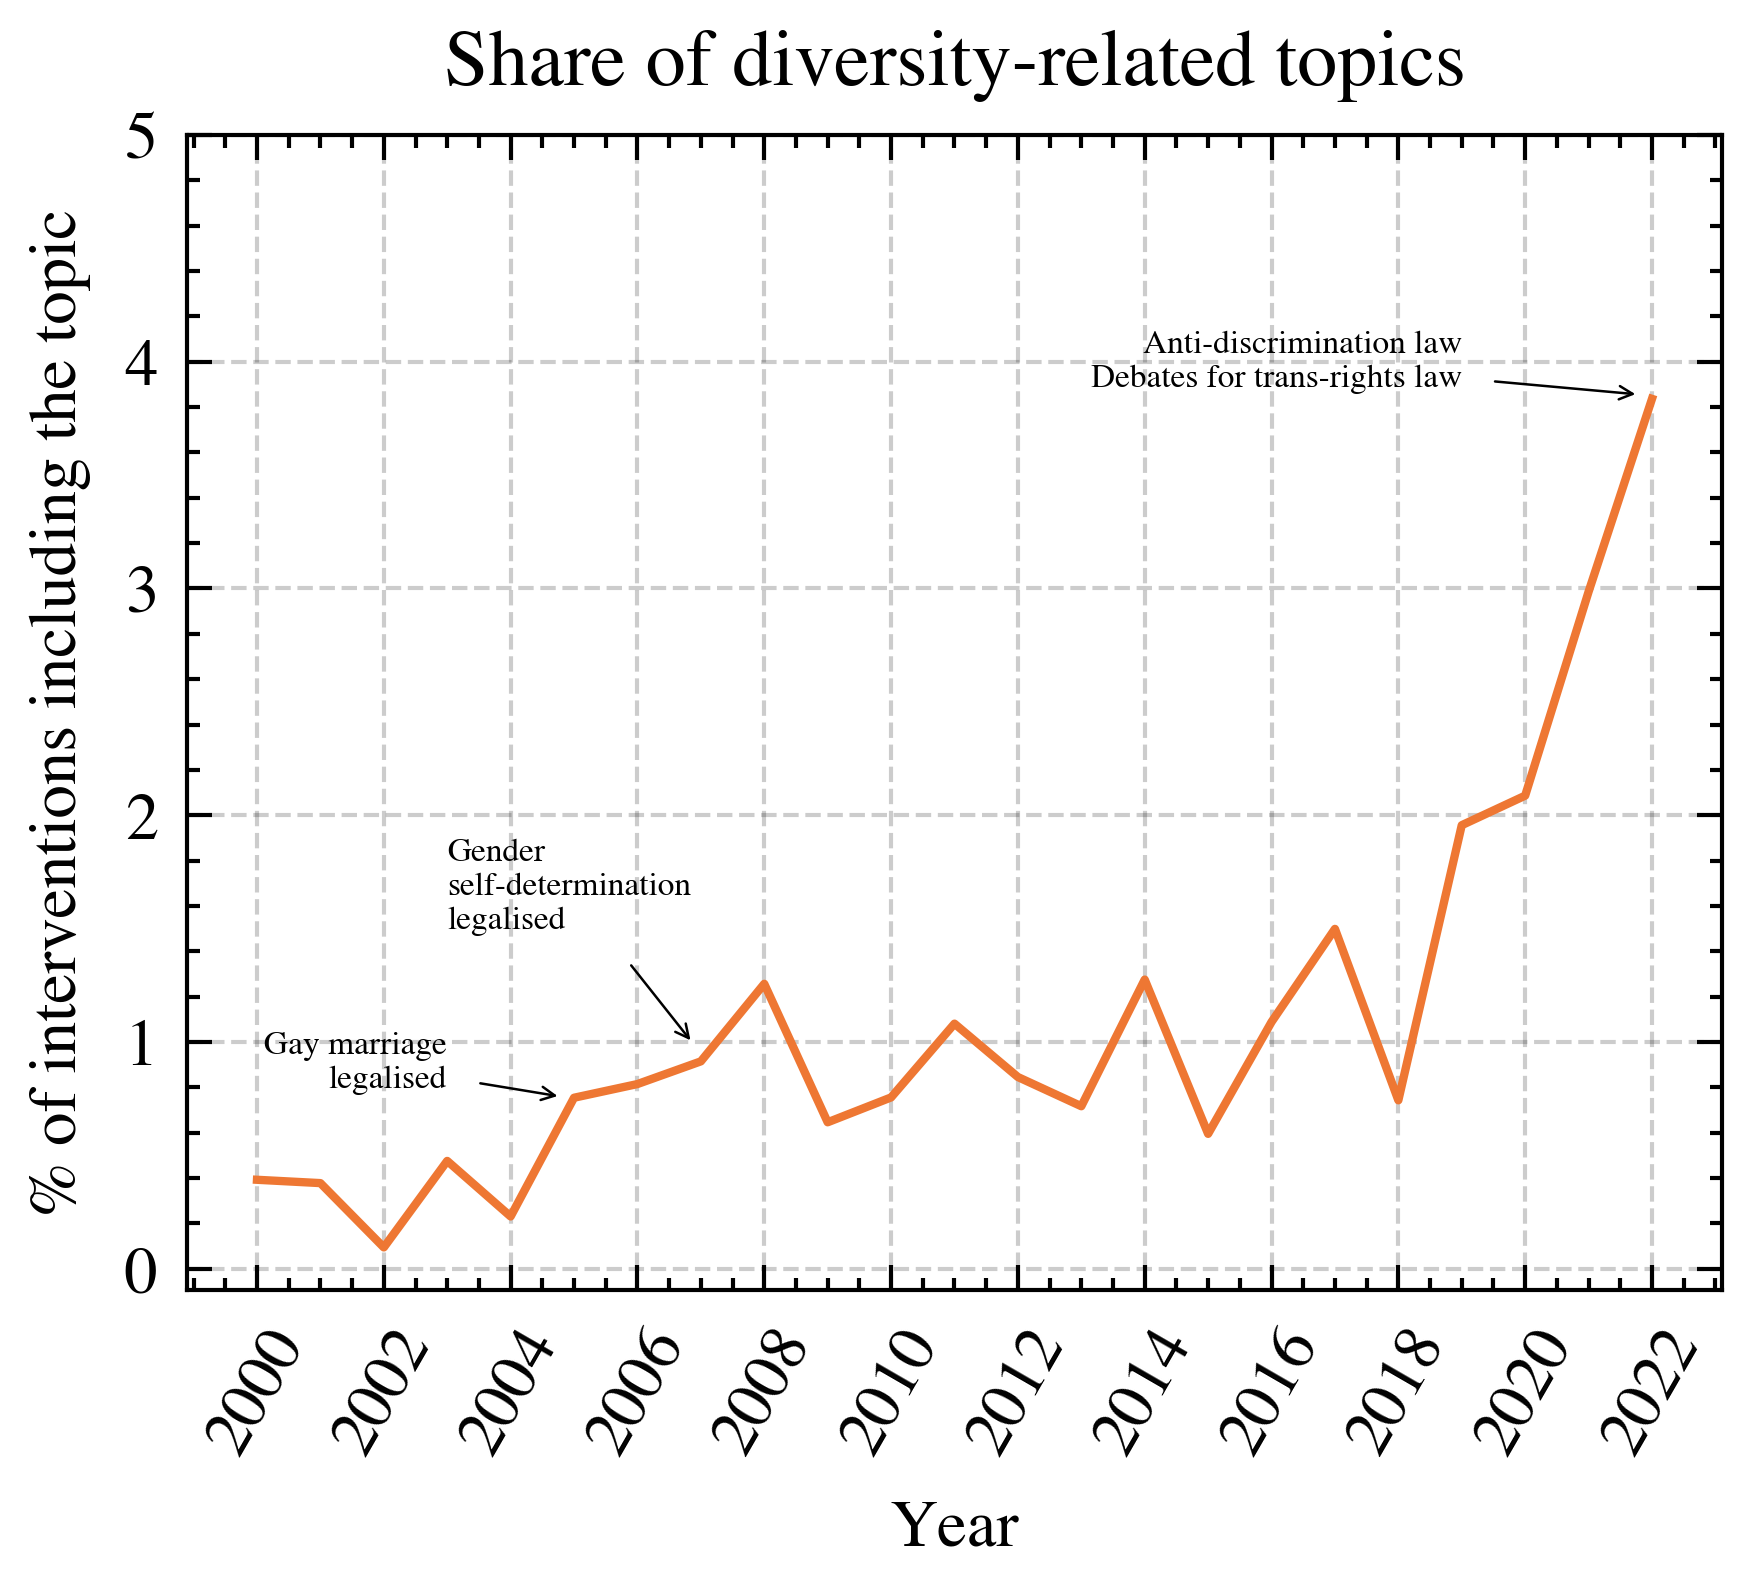

In [353]:
fig, ax = plt.subplots()

ax.plot(perc[:23], label = 'lgbt topics')

ax.set_xticks(range(2000, 2023, 2))
ax.set_xticklabels(range(2000, 2023, 2), rotation=60)  # , ha='right')

ax.set_yticks(range(0, 6, 1))

ax.grid(alpha=.2)

#ax.vlines(2005, ymin=0, ymax=5, color='black', linewidth = .4)
#ax.text(2005, 5, ' Gay marriage \n legalised', fontsize=4, horizontalalignment='left', verticalalignment='top')

#ax.vlines(2007, ymin=0, ymax=4, color='black', linewidth=.4)
#ax.text(2007, 4, ' Change of legal \n gender legalised', fontsize=4, horizontalalignment='left', verticalalignment='top')

ax.annotate(text='Gay marriage\nlegalised', xy=(2005, 0.75), xytext=(2003, 0.8), fontsize=4, arrowprops=dict(arrowstyle="->", lw=.3), horizontalalignment='right')
ax.annotate(text='Gender\nself-determination\nlegalised', xy=(2007, 0.95), xytext=(2003, 1.5), fontsize=4, arrowprops=dict(arrowstyle="->", lw=.3), horizontalalignment='left')
ax.annotate(text='Anti-discrimination law\nDebates for trans-rights law', xy=(2022, 3.85), xytext=(2019, 4), fontsize=4, arrowprops=dict(arrowstyle="->", lw=.3), ha='right', va='center')
# remove tick marks
#ax.xaxis.set_tick_params(size=0)
#ax.yaxis.set_tick_params(size=0)

# Titles
ax.set_xlabel('Year')
ax.set_ylabel(f'% of interventions including the topic')
ax.set_title('Share of diversity-related topics')
ax.title.set_weight('bold')

#ax.legend(fontsize=5)

#### Feminism

In [216]:
mask = corpus.phrases.apply(lambda x: any(term for term in feminism if term in x))
occurrence = corpus[mask].groupby(['year']).count()['phrases']
totals = corpus.groupby(['year']).count()['phrases']
perc = occurrence / totals * 100

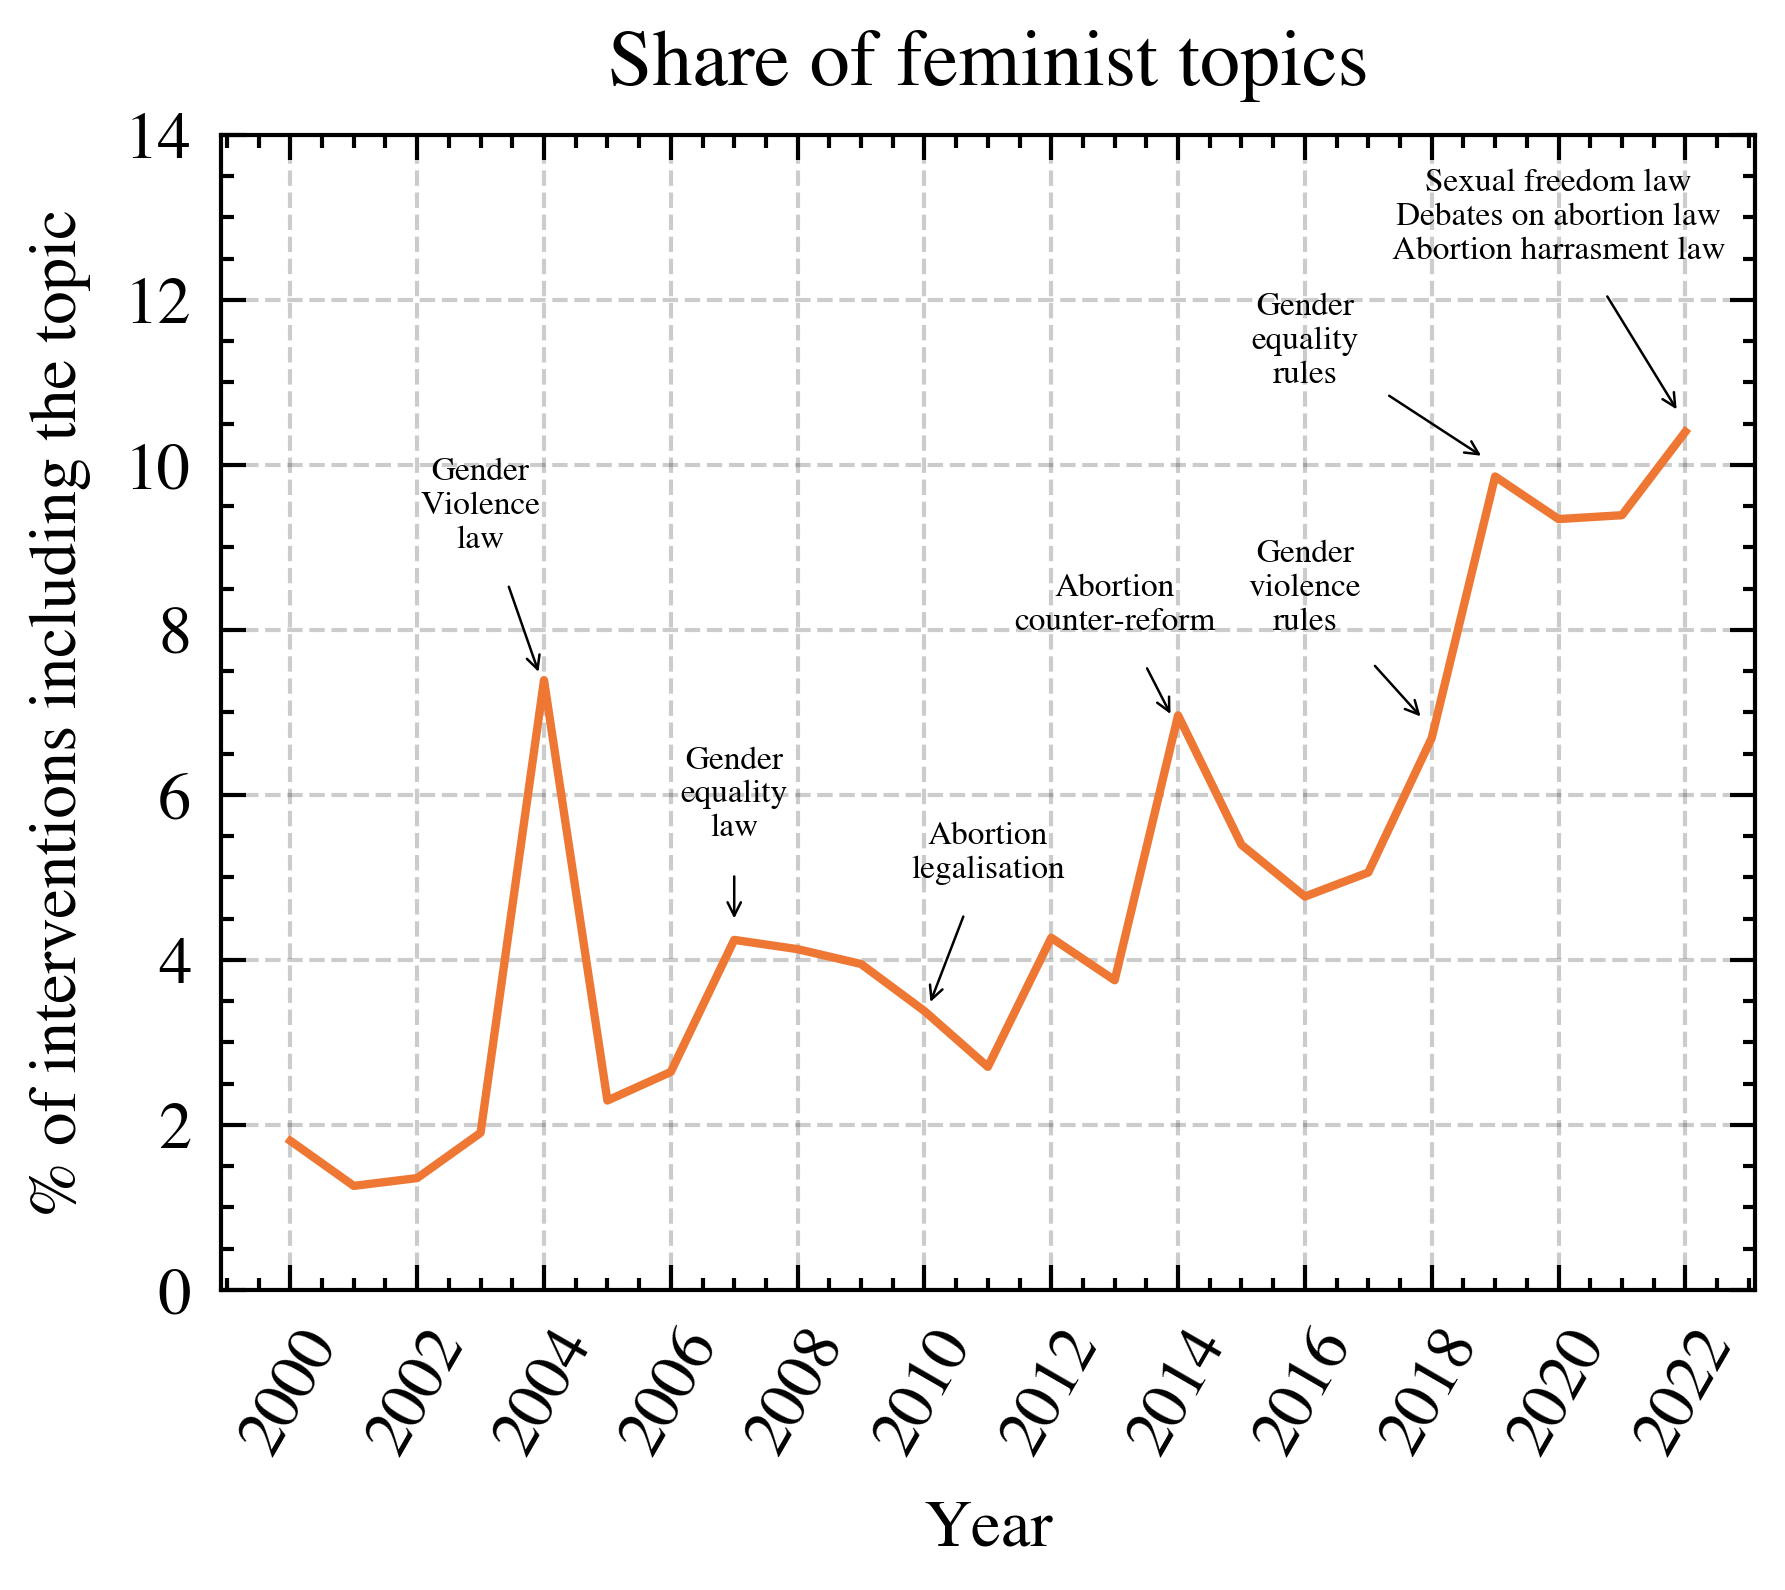

In [218]:
fig, ax = plt.subplots()

ax.plot(perc[:23], label='feminist topics')

ax.set_xticks(range(2000, 2023, 2))
ax.set_xticklabels(range(2000, 2023, 2), rotation=60)  # , ha='right')

ax.set_yticks(range(0, 16, 2))

ax.grid(alpha=.2)

#ax.vlines(2005, ymin=0, ymax=5, color='black', linewidth = .4)
#ax.text(2005, 5, ' Gay marriage \n legalised', fontsize=4, horizontalalignment='left', verticalalignment='top')

#ax.vlines(2007, ymin=0, ymax=4, color='black', linewidth=.4)
#ax.text(2007, 4, ' Change of legal \n gender legalised', fontsize=4, horizontalalignment='left', verticalalignment='top')

ax.annotate(text='Gender\nViolence\nlaw', xy=(2004, 7.3), xytext=(2003, 9),fontsize=4, arrowprops=dict(arrowstyle="->", lw=.3), ha='center')
ax.annotate(text='Abortion\nlegalisation', xy=(2010, 3.3), xytext=(2011, 5), fontsize=4, arrowprops=dict(arrowstyle="->", lw=.3), ha='center')
ax.annotate(text='Gender\nequality\nlaw', xy=(2007, 4.3), xytext=(2007, 5.5), fontsize=4, arrowprops=dict(arrowstyle="->", lw=.3), ha='center')
ax.annotate(text='Abortion\ncounter-reform', xy=(2014, 6.8), xytext=(2013, 8), fontsize=4, arrowprops=dict(arrowstyle="->", lw=.3), ha='center')
ax.annotate(text='Gender\nviolence\nrules', xy=(2018, 6.8), xytext=(2016, 8),fontsize=4, arrowprops=dict(arrowstyle="->", lw=.3), ha='center')
ax.annotate(text='Gender\nequality\nrules', xy=(2019, 10), xytext=(2016, 11), fontsize=4, arrowprops=dict(arrowstyle="->", lw=.3), ha='center')
ax.annotate(text='Sexual freedom law\nDebates on abortion law\nAbortion harrasment law', xy=(2022, 10.5), xytext=(2020, 12.5), fontsize=4, arrowprops=dict(arrowstyle="->", lw=.3), ha='center')

# Titles
ax.set_xlabel('Year')
ax.set_ylabel(f'% of interventions including the topic')
ax.set_title('Share of feminist topics')
ax.title.set_weight('bold')

#ax.legend(fontsize=5)

#### Labour Rights

In [343]:
mask = corpus.phrases.apply(lambda x: any(term for term in labour if term in x))
occurrence = corpus[mask].groupby(['year']).count()['phrases']
totals = corpus.groupby(['year']).count()['phrases']
perc = occurrence / totals * 100

In [225]:
unemployment_rate = pd.Series(index=range(2000, 2023), data=[13.8, 10.4, 11.2,11.3,11.1,9.2,8.5, 8.2,11.3,17.9,19.9, 21.4, 24.8, 26.1, 24.4, 22.1, 19.6, 17.2, 15.3, 14.1, 15.5, 14.7, 13.01])

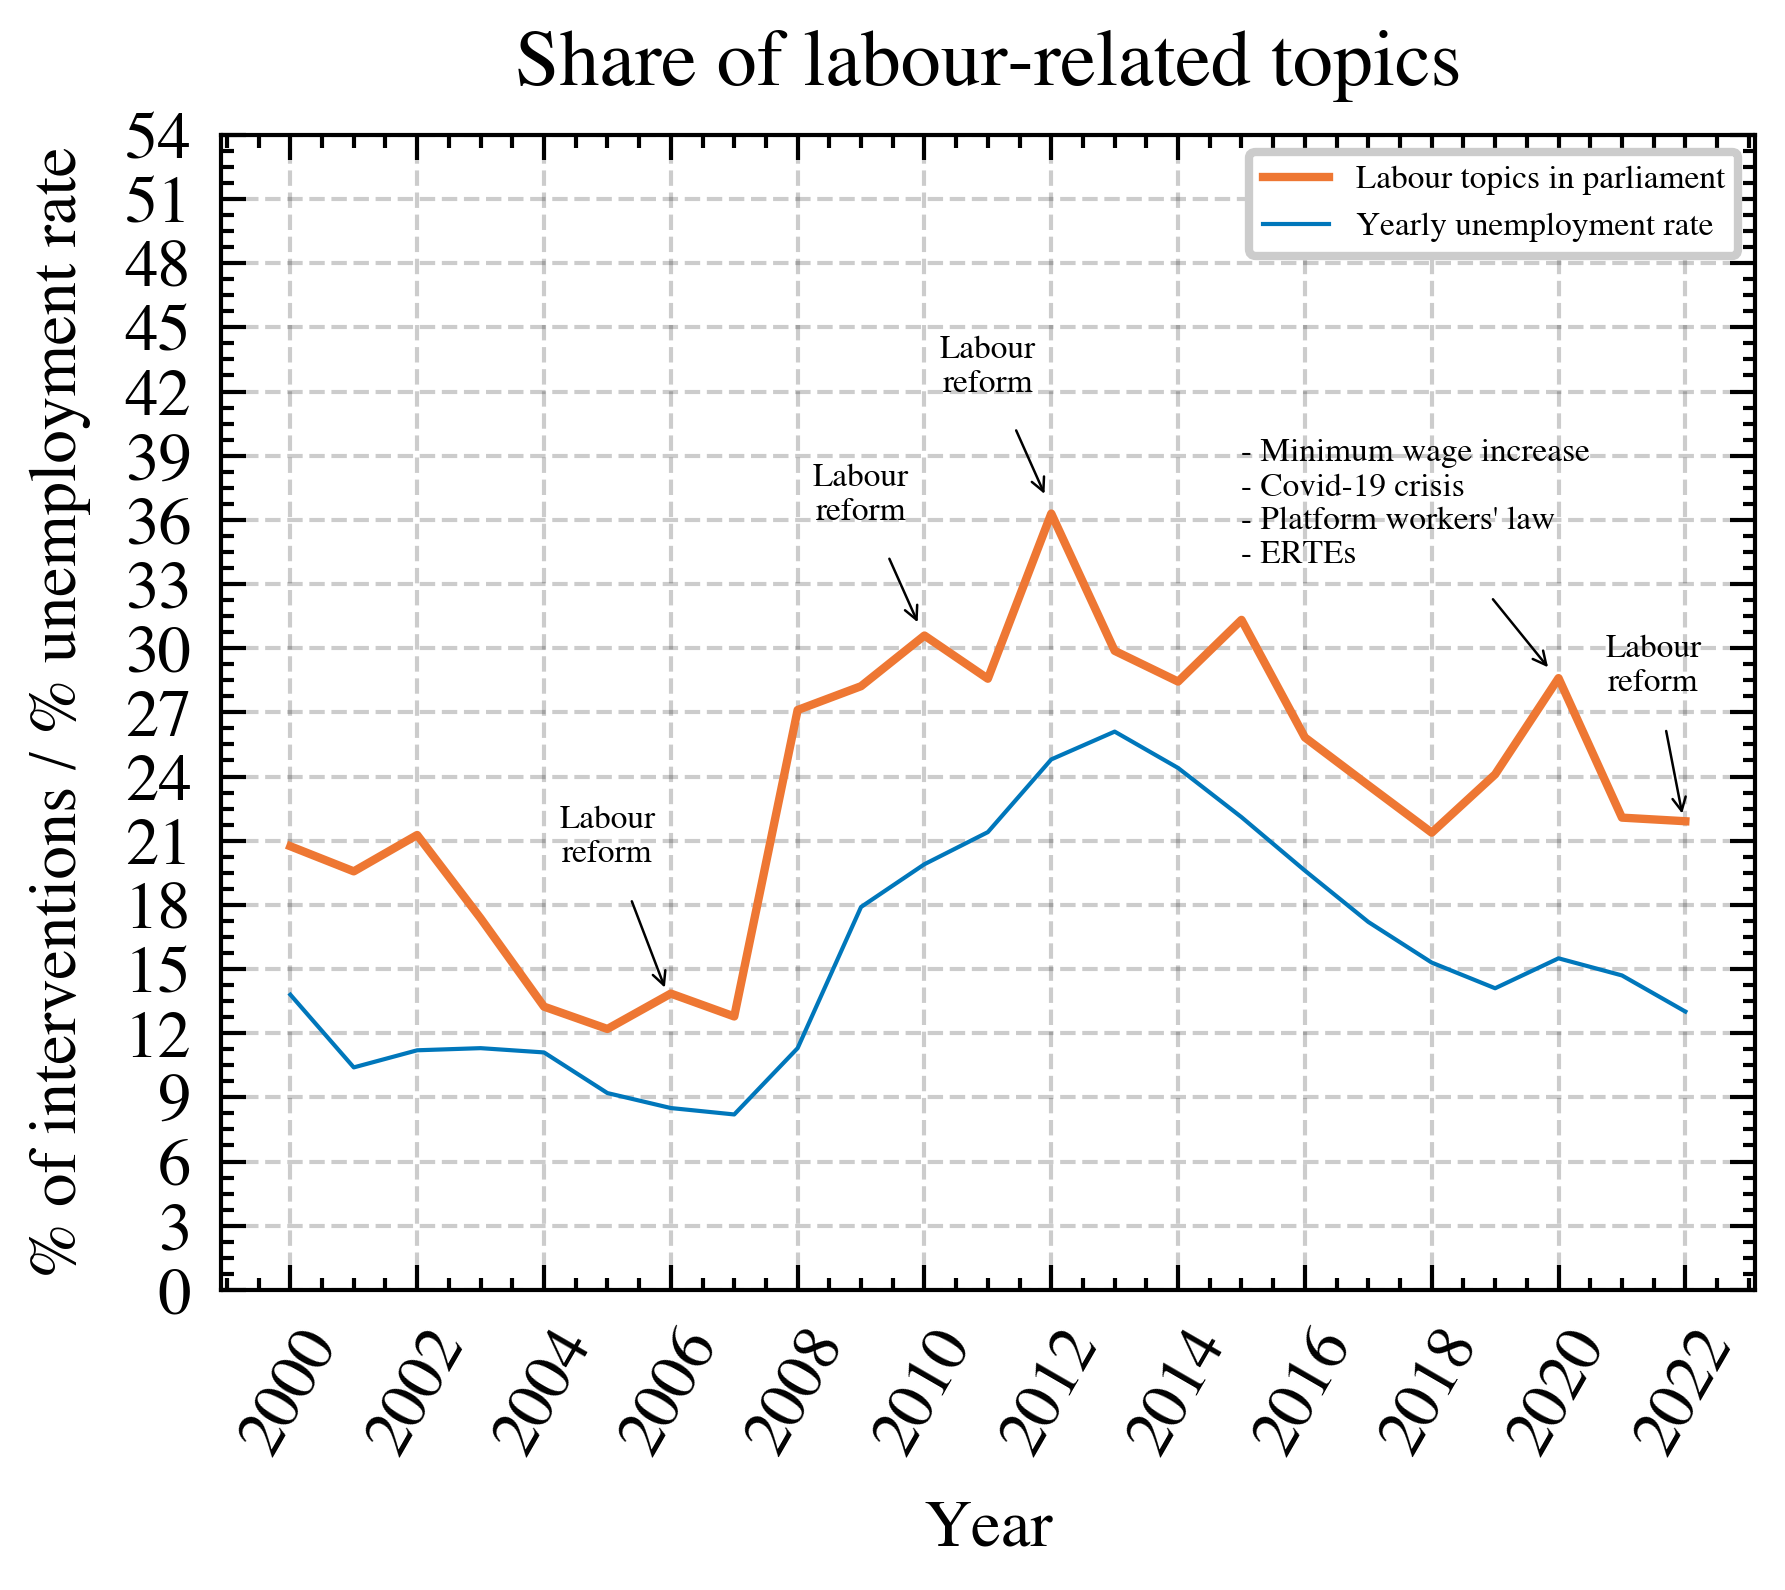

In [348]:
fig, ax = plt.subplots()

ax.plot(perc[:23], label='Labour topics in parliament')
ax.plot(unemployment_rate, label='Yearly unemployment rate', lw=.5)

ax.set_xticks(range(2000, 2023, 2))
ax.set_xticklabels(range(2000, 2023, 2), rotation=60)  # , ha='right')

ax.set_yticks(range(0, 55, 3))

ax.grid(alpha=.2)

ax.annotate(text="Labour\nreform", xy=(2006, 13.4), xytext=(2005, 20), fontsize=4, arrowprops=dict(arrowstyle="->", lw=.3), ha='center')
ax.annotate(text="Labour\nreform", xy=(2010, 30.5), xytext=(2009, 36),fontsize=4, arrowprops=dict(arrowstyle="->", lw=.3), ha='center')
ax.annotate(text="Labour\nreform", xy=(2012, 36.5), xytext=(2011, 42), fontsize=4, arrowprops=dict(arrowstyle="->", lw=.3), ha='center')
ax.annotate(text="- Minimum wage increase\n- Covid-19 crisis\n- Platform workers' law\n- ERTEs", xy=(2020, 28.5), xytext=(2015, 34), fontsize=4, arrowprops=dict(arrowstyle="->", lw=.3), ha='left')
ax.annotate(text="Labour\nreform", xy=(2022, 21.5), xytext=(2021.5, 28), fontsize=4, arrowprops=dict(arrowstyle="->", lw=.3), ha='center')

# Titles
ax.set_xlabel('Year')
ax.set_ylabel(f'% of interventions / % unemployment rate')
ax.set_title('Share of labour-related topics')
ax.title.set_weight('bold')

ax.legend(fontsize=4)


#### Environment

In [264]:
mask = corpus.phrases.apply(lambda x: any(term for term in planet if term in x))
occurrence = corpus[mask].groupby(['year']).count()['phrases']
totals = corpus.groupby(['year']).count()['phrases']
perc = occurrence / totals * 100

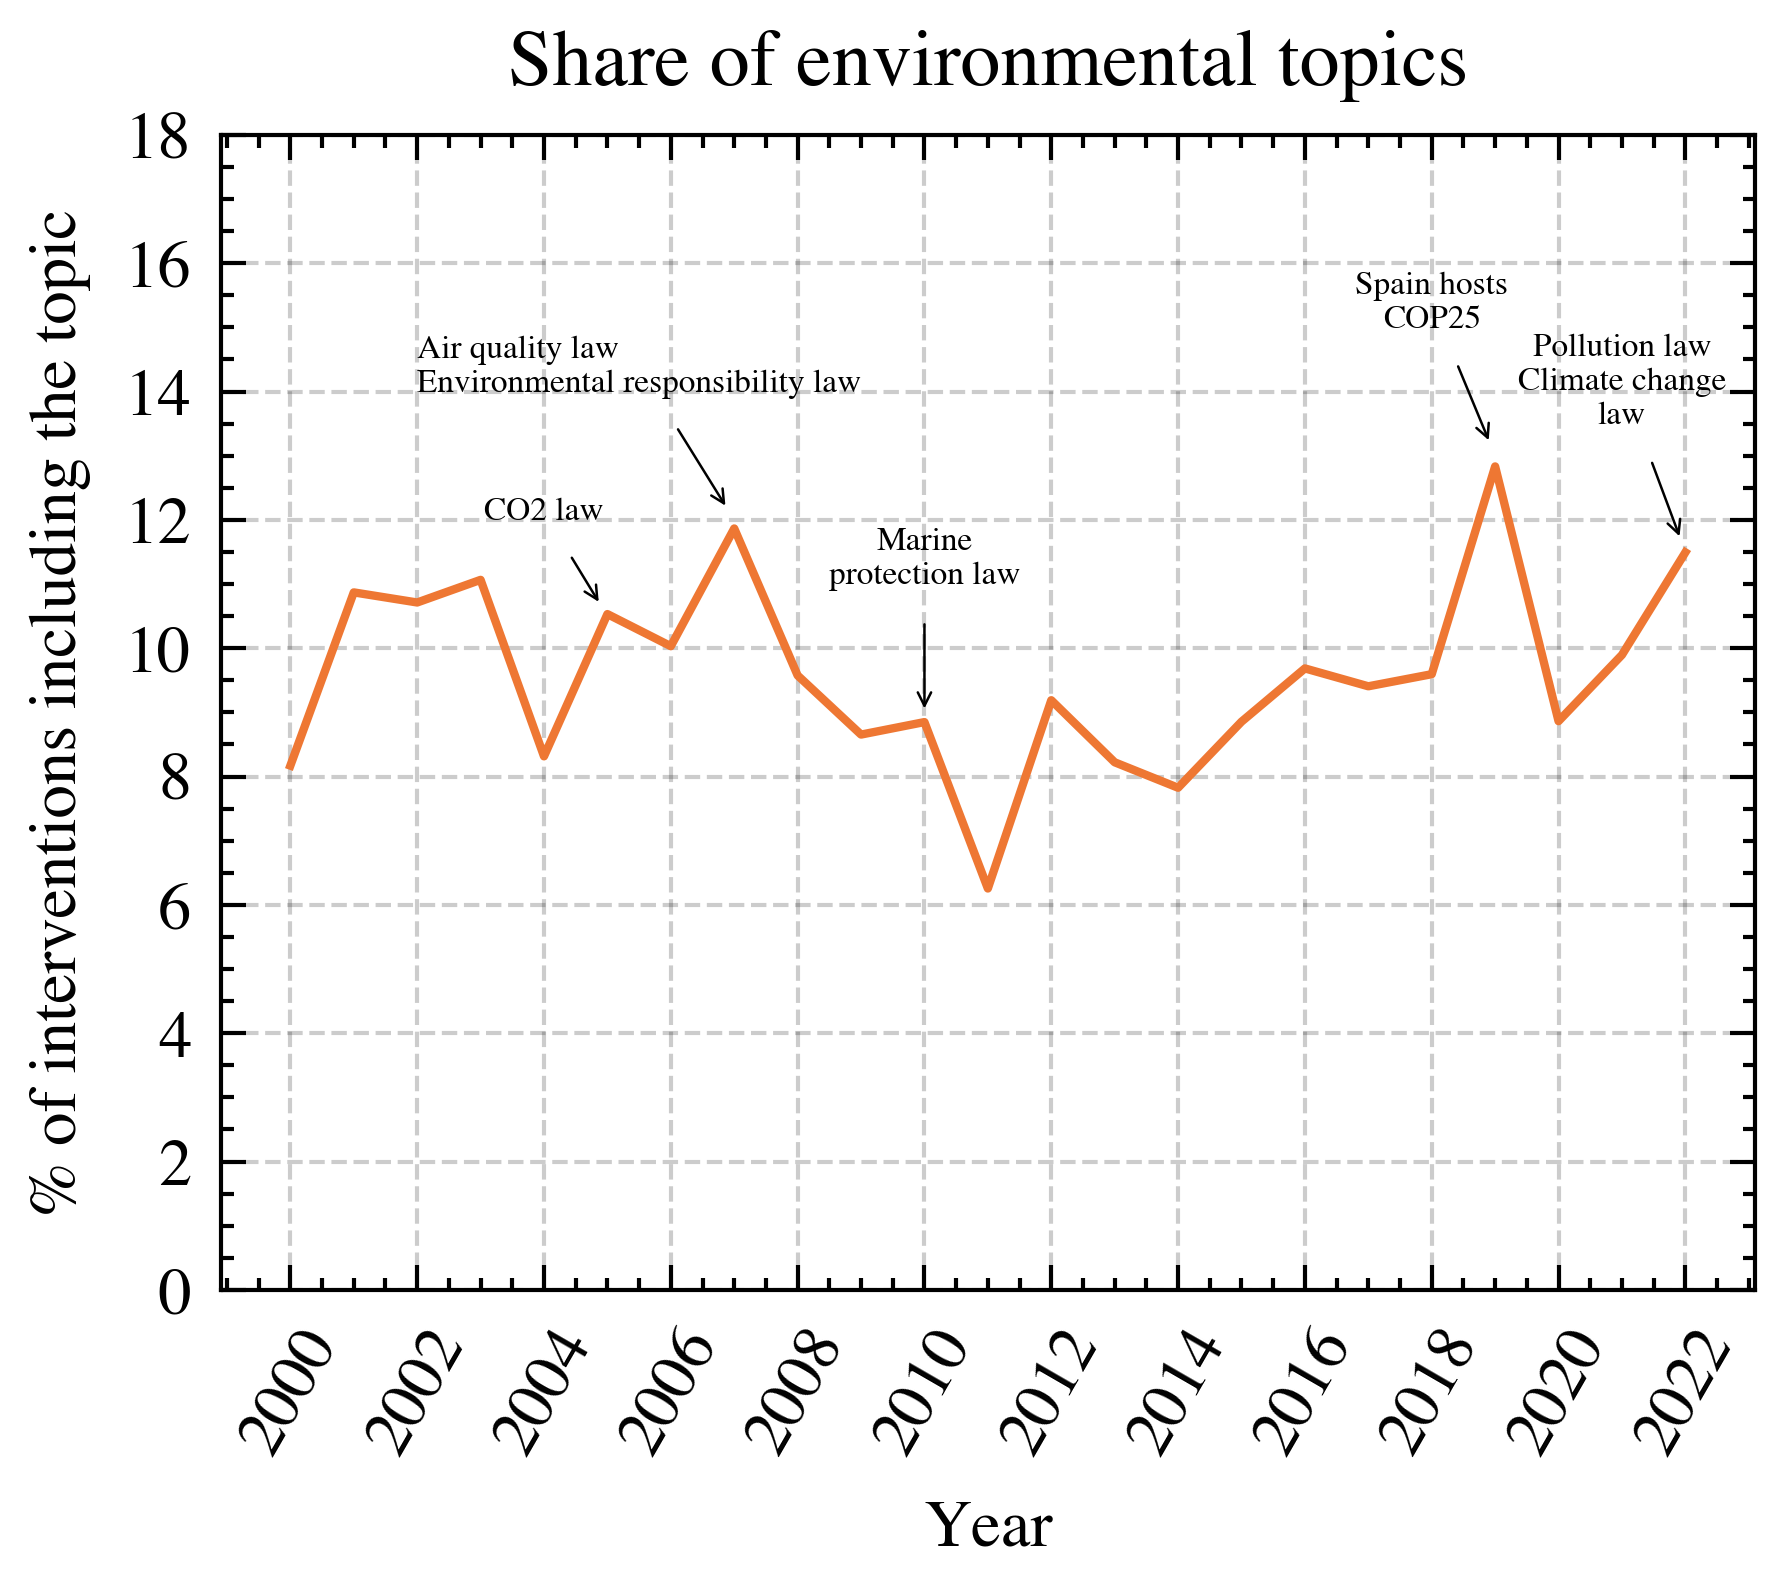

In [293]:
fig, ax = plt.subplots()

ax.plot(perc[:23], label='Environmental topics')
#ax.plot(unemployment_rate, label='Yearly unemployment rate', lw=.5)

ax.set_xticks(range(2000, 2023, 2))
ax.set_xticklabels(range(2000, 2023, 2), rotation=60)  # , ha='right')

ax.set_yticks(range(0, 20, 2))

ax.grid(alpha=.2)

ax.annotate(text="CO2 law", xy=(2005, 10.5), xytext=(2004, 12), fontsize=4, arrowprops=dict(arrowstyle="->", lw=.3), ha='center')
ax.annotate(text="Air quality law\nEnvironmental responsibility law", xy=(2007, 12), xytext=(2002, 14),fontsize=4, arrowprops=dict(arrowstyle="->", lw=.3), ha='left')
ax.annotate(text="Marine\nprotection law", xy=(2010, 8.8), xytext=(2010, 11), fontsize=4, arrowprops=dict(arrowstyle="->", lw=.3), ha='center')
ax.annotate(text="Spain hosts\nCOP25", xy=(2019, 13), xytext=(2018, 15),fontsize=4, arrowprops=dict(arrowstyle="->", lw=.3), ha='center')
ax.annotate(text="Pollution law\nClimate change\nlaw", xy=(2022, 11.5), xytext=(2021, 13.5), fontsize=4, arrowprops=dict(arrowstyle="->", lw=.3), ha='center')

# Titles
ax.set_xlabel('Year')
ax.set_ylabel(f'% of interventions including the topic')
ax.set_title('Share of environmental topics')
ax.title.set_weight('bold')

#ax.legend(fontsize=4)


#### Catalan Territorial Conflict

In [8]:
mask = corpus.phrases.apply(lambda x: any(term for term in catalan if term in x))
occurrence = corpus[mask].groupby(['year']).count()['phrases']
totals = corpus.groupby(['year']).count()['phrases']
perc = occurrence / totals * 100

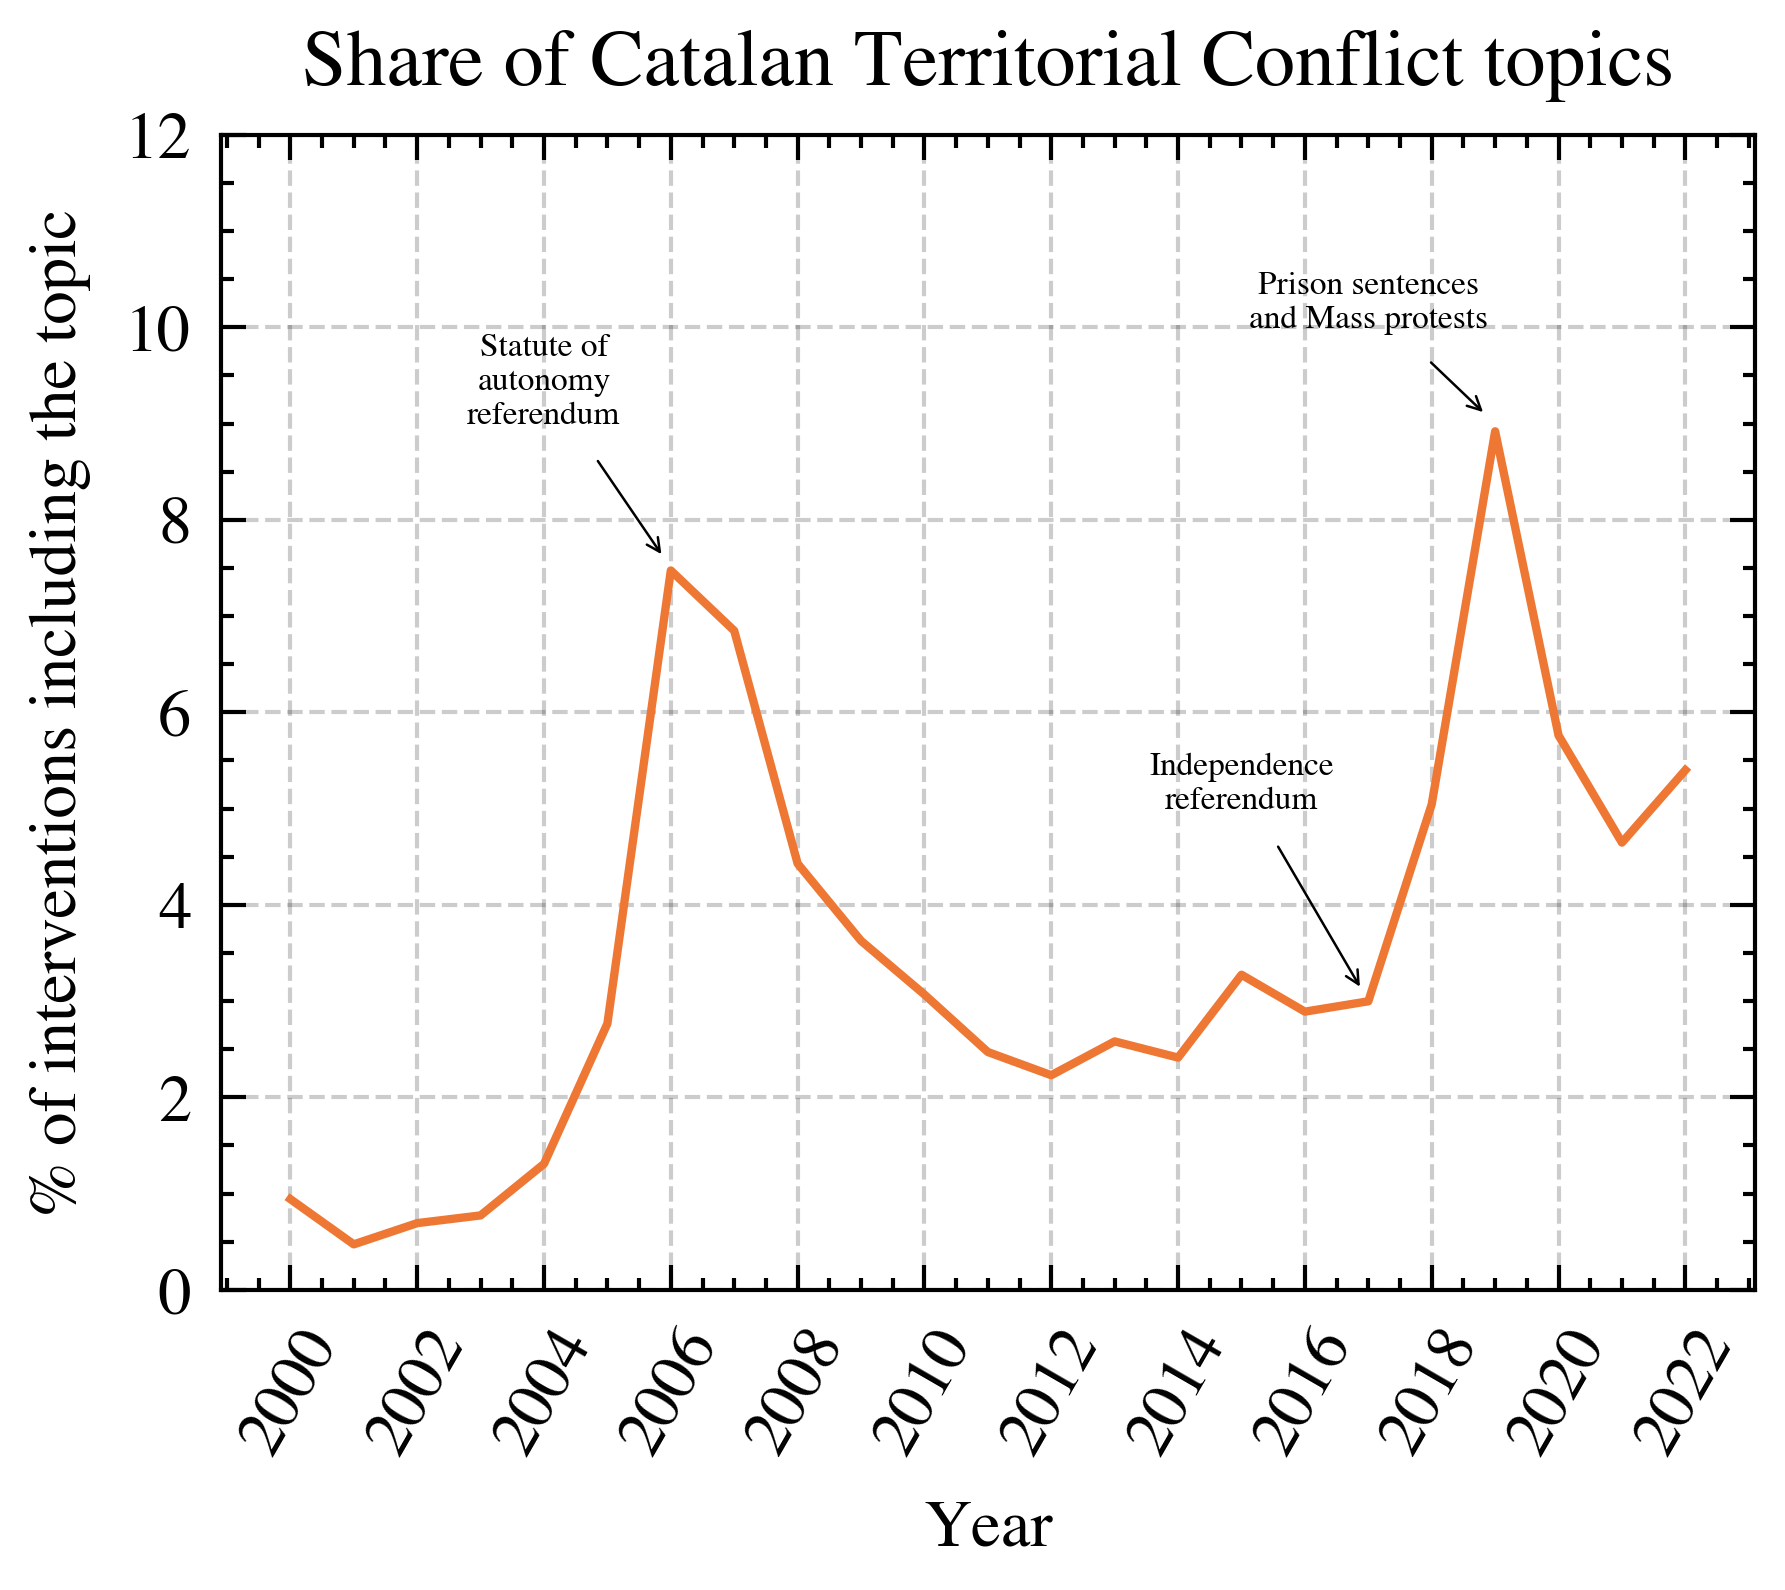

In [10]:
fig, ax = plt.subplots()

ax.plot(perc[:23], label='Catalan independence-related topics')
#ax.plot(unemployment_rate, label='Yearly unemployment rate', lw=.5)

ax.set_xticks(range(2000, 2023, 2))
ax.set_xticklabels(range(2000, 2023, 2), rotation=60)  # , ha='right')

ax.set_yticks(range(0, 14, 2))

ax.grid(alpha=.2)

ax.annotate(text="Statute of\nautonomy\nreferendum", xy=(2006, 7.5), xytext=(2004, 9), fontsize=4, arrowprops=dict(arrowstyle="->", lw=.3), ha='center')
ax.annotate(text="Independence\nreferendum", xy=(2017, 3), xytext=(2015, 5), fontsize=4, arrowprops=dict(arrowstyle="->", lw=.3), ha='center')
ax.annotate(text="Prison sentences\nand Mass protests", xy=(2019, 9), xytext=(2017, 10), fontsize=4, arrowprops=dict(arrowstyle="->", lw=.3), ha='center')

# Titles
ax.set_xlabel('Year')
ax.set_ylabel(f'% of interventions including the topic')
ax.set_title("Share of Catalan Territorial Conflict topics")
ax.title.set_weight('bold')

#ax.legend(fontsize=4)


#### Terrorism

In [355]:
mask = corpus.phrases.apply(lambda x: any(
    term for term in terrorism if term in x))
occurrence = corpus[mask].groupby(['year']).count()['phrases']
totals = corpus.groupby(['year']).count()['phrases']
perc = occurrence / totals * 100


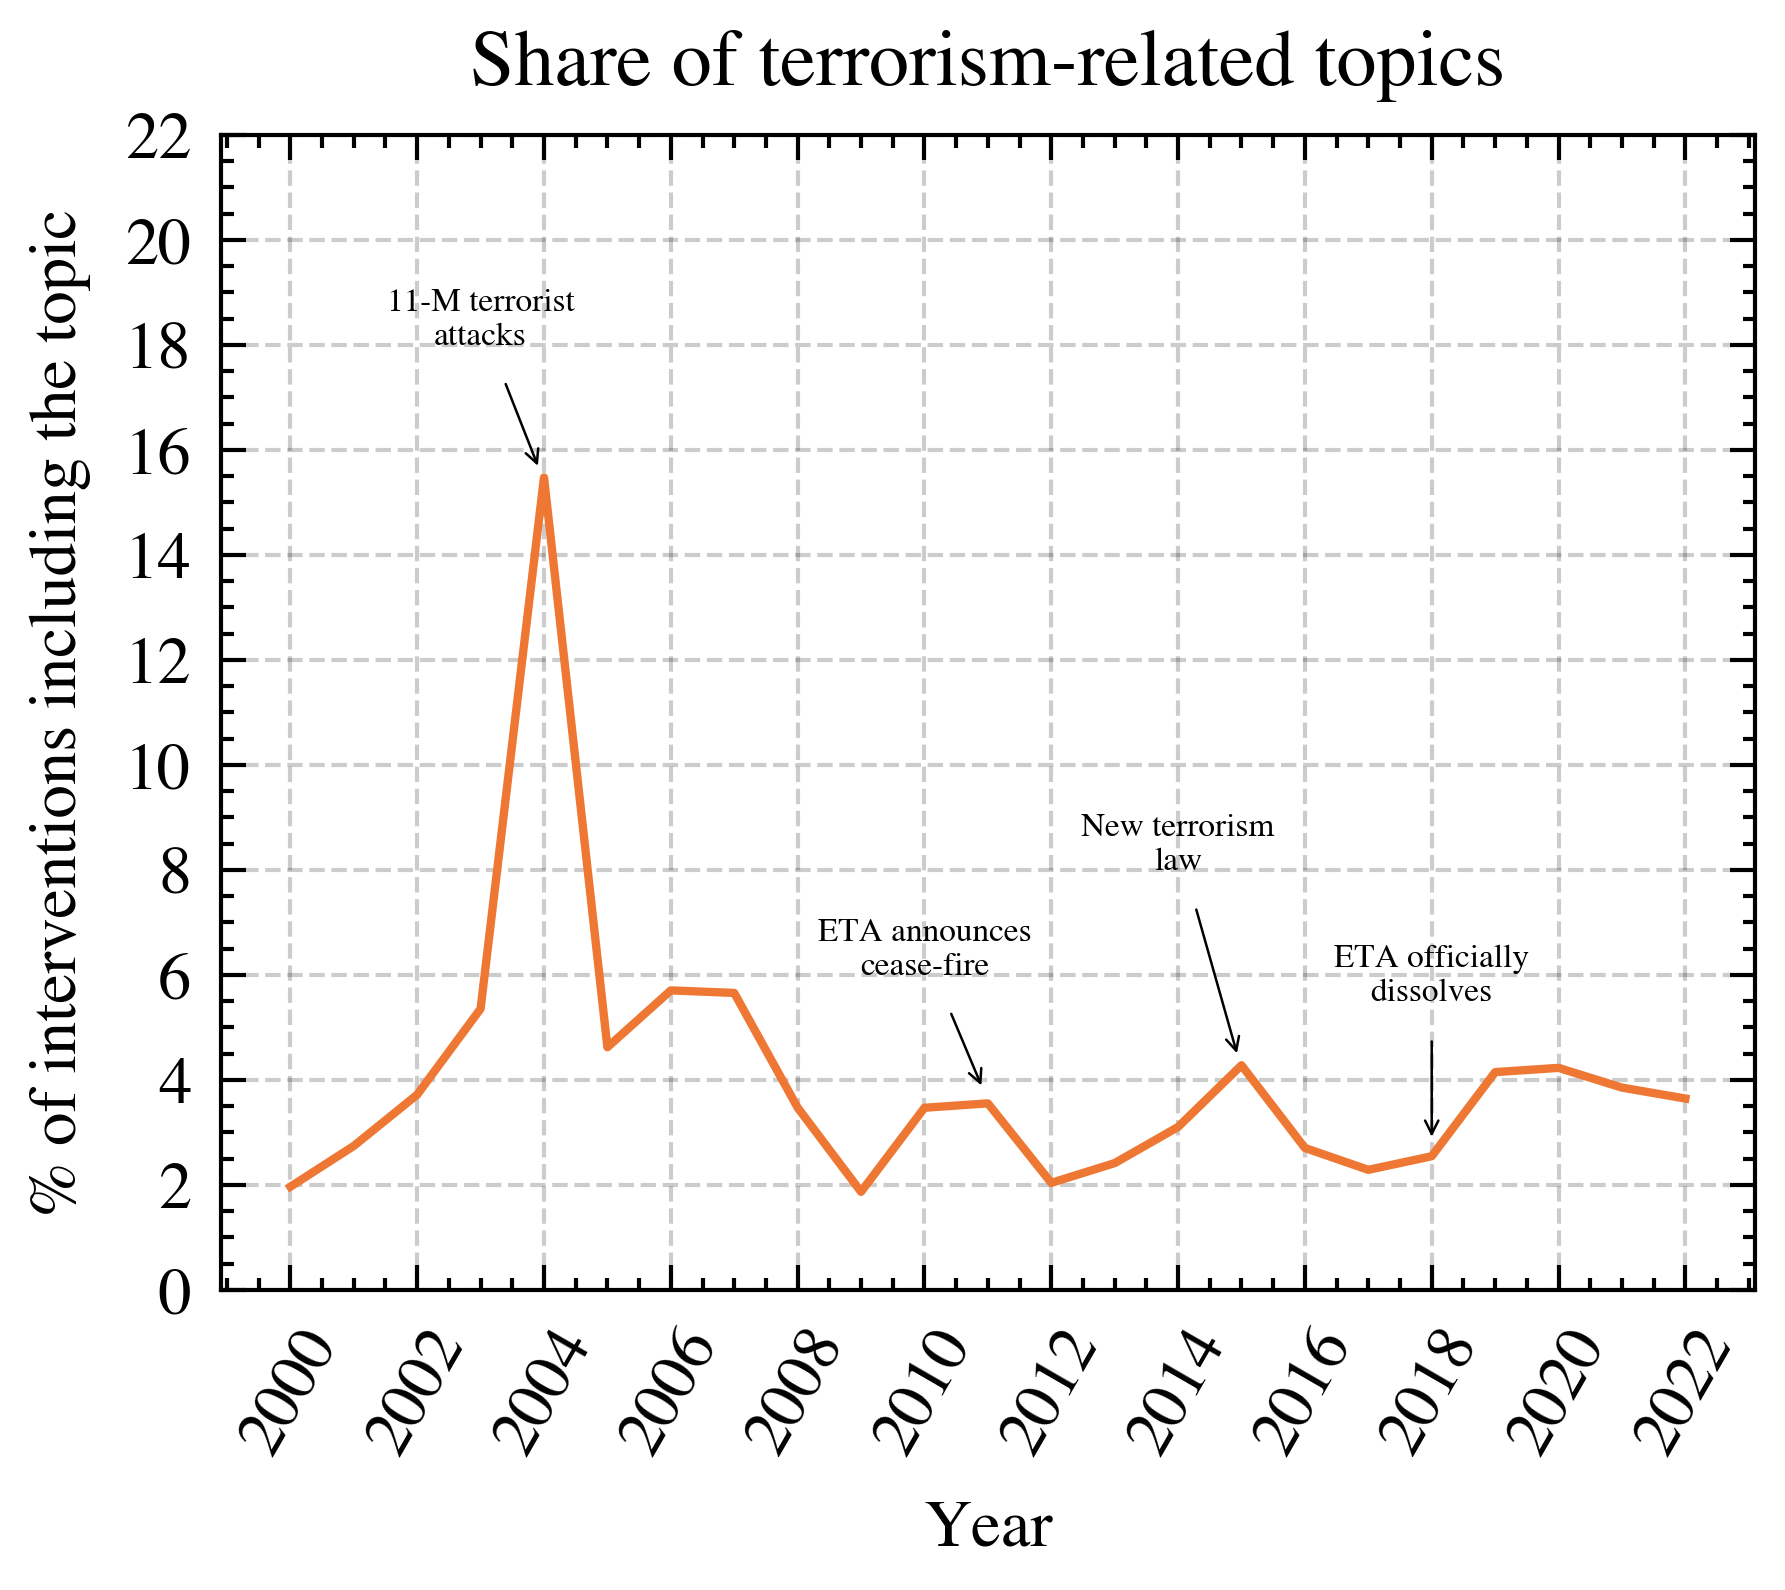

In [356]:
fig, ax = plt.subplots()

ax.plot(perc[:23], label='Terrorism-related topics')
#ax.plot(unemployment_rate, label='Yearly unemployment rate', lw=.5)

ax.set_xticks(range(2000, 2023, 2))
ax.set_xticklabels(range(2000, 2023, 2), rotation=60)  # , ha='right')

ax.set_yticks(range(0, 23, 2))

ax.grid(alpha=.2)

ax.annotate(text="11-M terrorist\nattacks", xy=(2004, 15.4), xytext=(2003, 18), fontsize=4, arrowprops=dict(arrowstyle="->", lw=.3), ha='center')
ax.annotate(text="ETA announces\ncease-fire", xy=(2011, 3.6), xytext=(2010, 6),fontsize=4, arrowprops=dict(arrowstyle="->", lw=.3), ha='center')
ax.annotate(text="ETA officially\ndissolves", xy=(2018, 2.6), xytext=(2018, 5.5), fontsize=4, arrowprops=dict(arrowstyle="->", lw=.3), ha='center')
ax.annotate(text="New terrorism\nlaw", xy=(2015, 4.2), xytext=(2014, 8), fontsize=4, arrowprops=dict(arrowstyle="->", lw=.3), ha='center')

# Titles
ax.set_xlabel('Year')
ax.set_ylabel(f'% of interventions including the topic')
ax.set_title("Share of terrorism-related topics")
ax.title.set_weight('bold')

#ax.legend(fontsize=4)


#### Housing

In [330]:
mask = corpus.phrases.apply(lambda x: any(term for term in housing if term in x))
occurrence = corpus[mask].groupby(['year']).count()['phrases']
totals = corpus.groupby(['year']).count()['phrases']
perc = occurrence / totals * 100

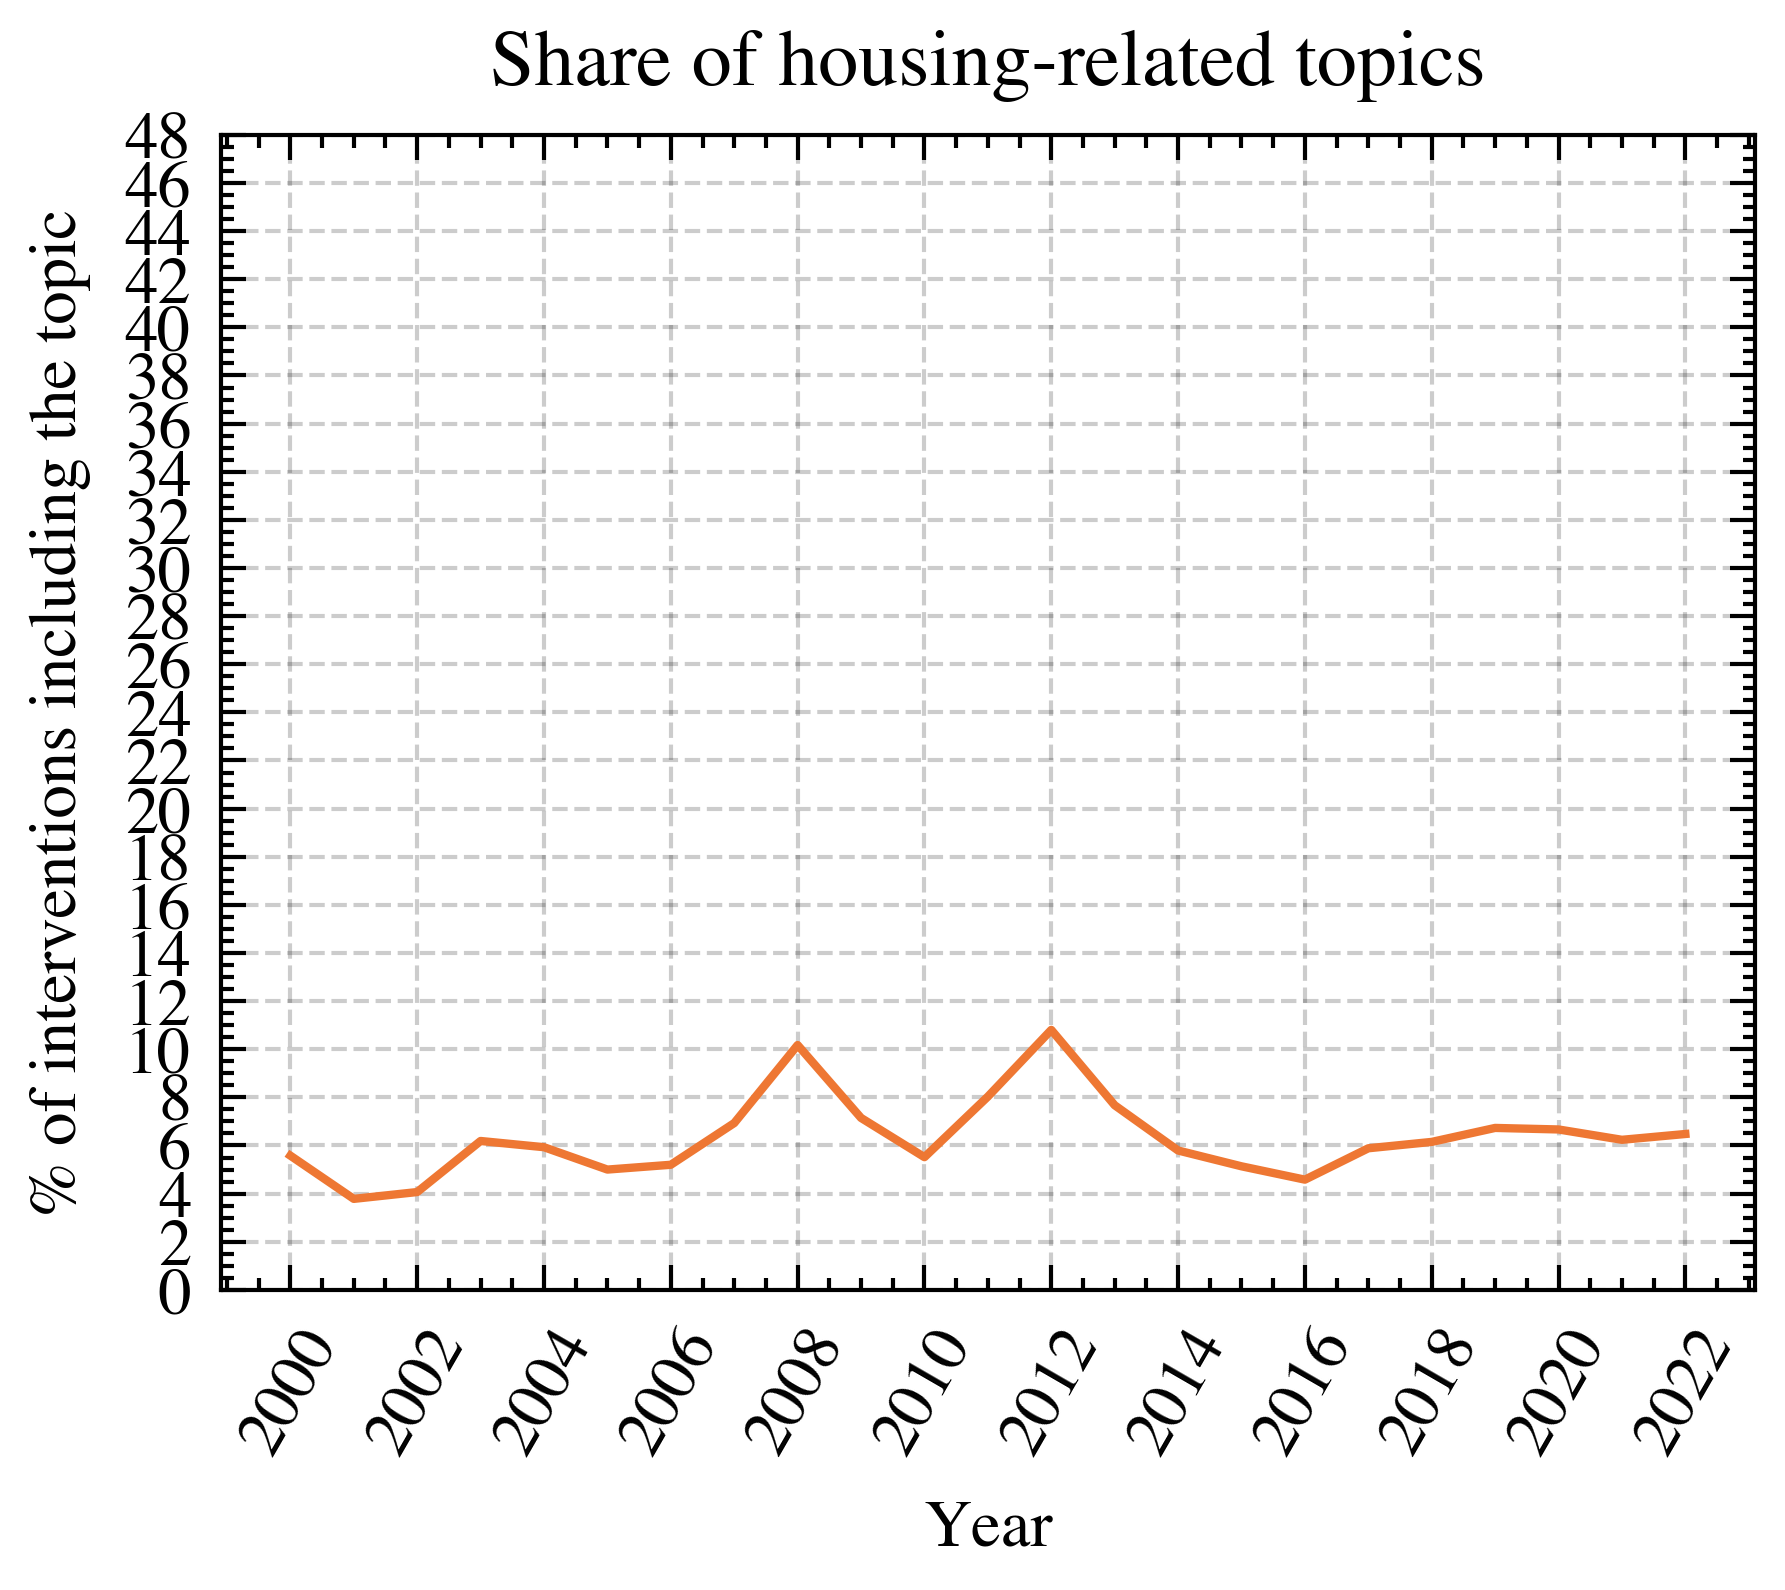

In [333]:
fig, ax = plt.subplots()

ax.plot(perc[:23], label='Housing-related topics')
#ax.plot(unemployment_rate, label='Yearly unemployment rate', lw=.5)

ax.set_xticks(range(2000, 2023, 2))
ax.set_xticklabels(range(2000, 2023, 2), rotation=60)  # , ha='right')

ax.set_yticks(range(0, 50, 2))

ax.grid(alpha=.2)

#ax.annotate(text="11-M terrorist\nattacks", xy=(2004, 15.4), xytext=(2003, 18),fontsize=4, arrowprops=dict(arrowstyle="->", lw=.3), ha='center')


# Titles
ax.set_xlabel('Year')
ax.set_ylabel(f'% of interventions including the topic')
ax.set_title("Share of housing-related topics")
ax.title.set_weight('bold')

#ax.legend(fontsize=4)


#### Economy

In [334]:
mask = corpus.phrases.apply(lambda x: any(term for term in economy if term in x))
occurrence = corpus[mask].groupby(['year']).count()['phrases']
totals = corpus.groupby(['year']).count()['phrases']
perc = occurrence / totals * 100


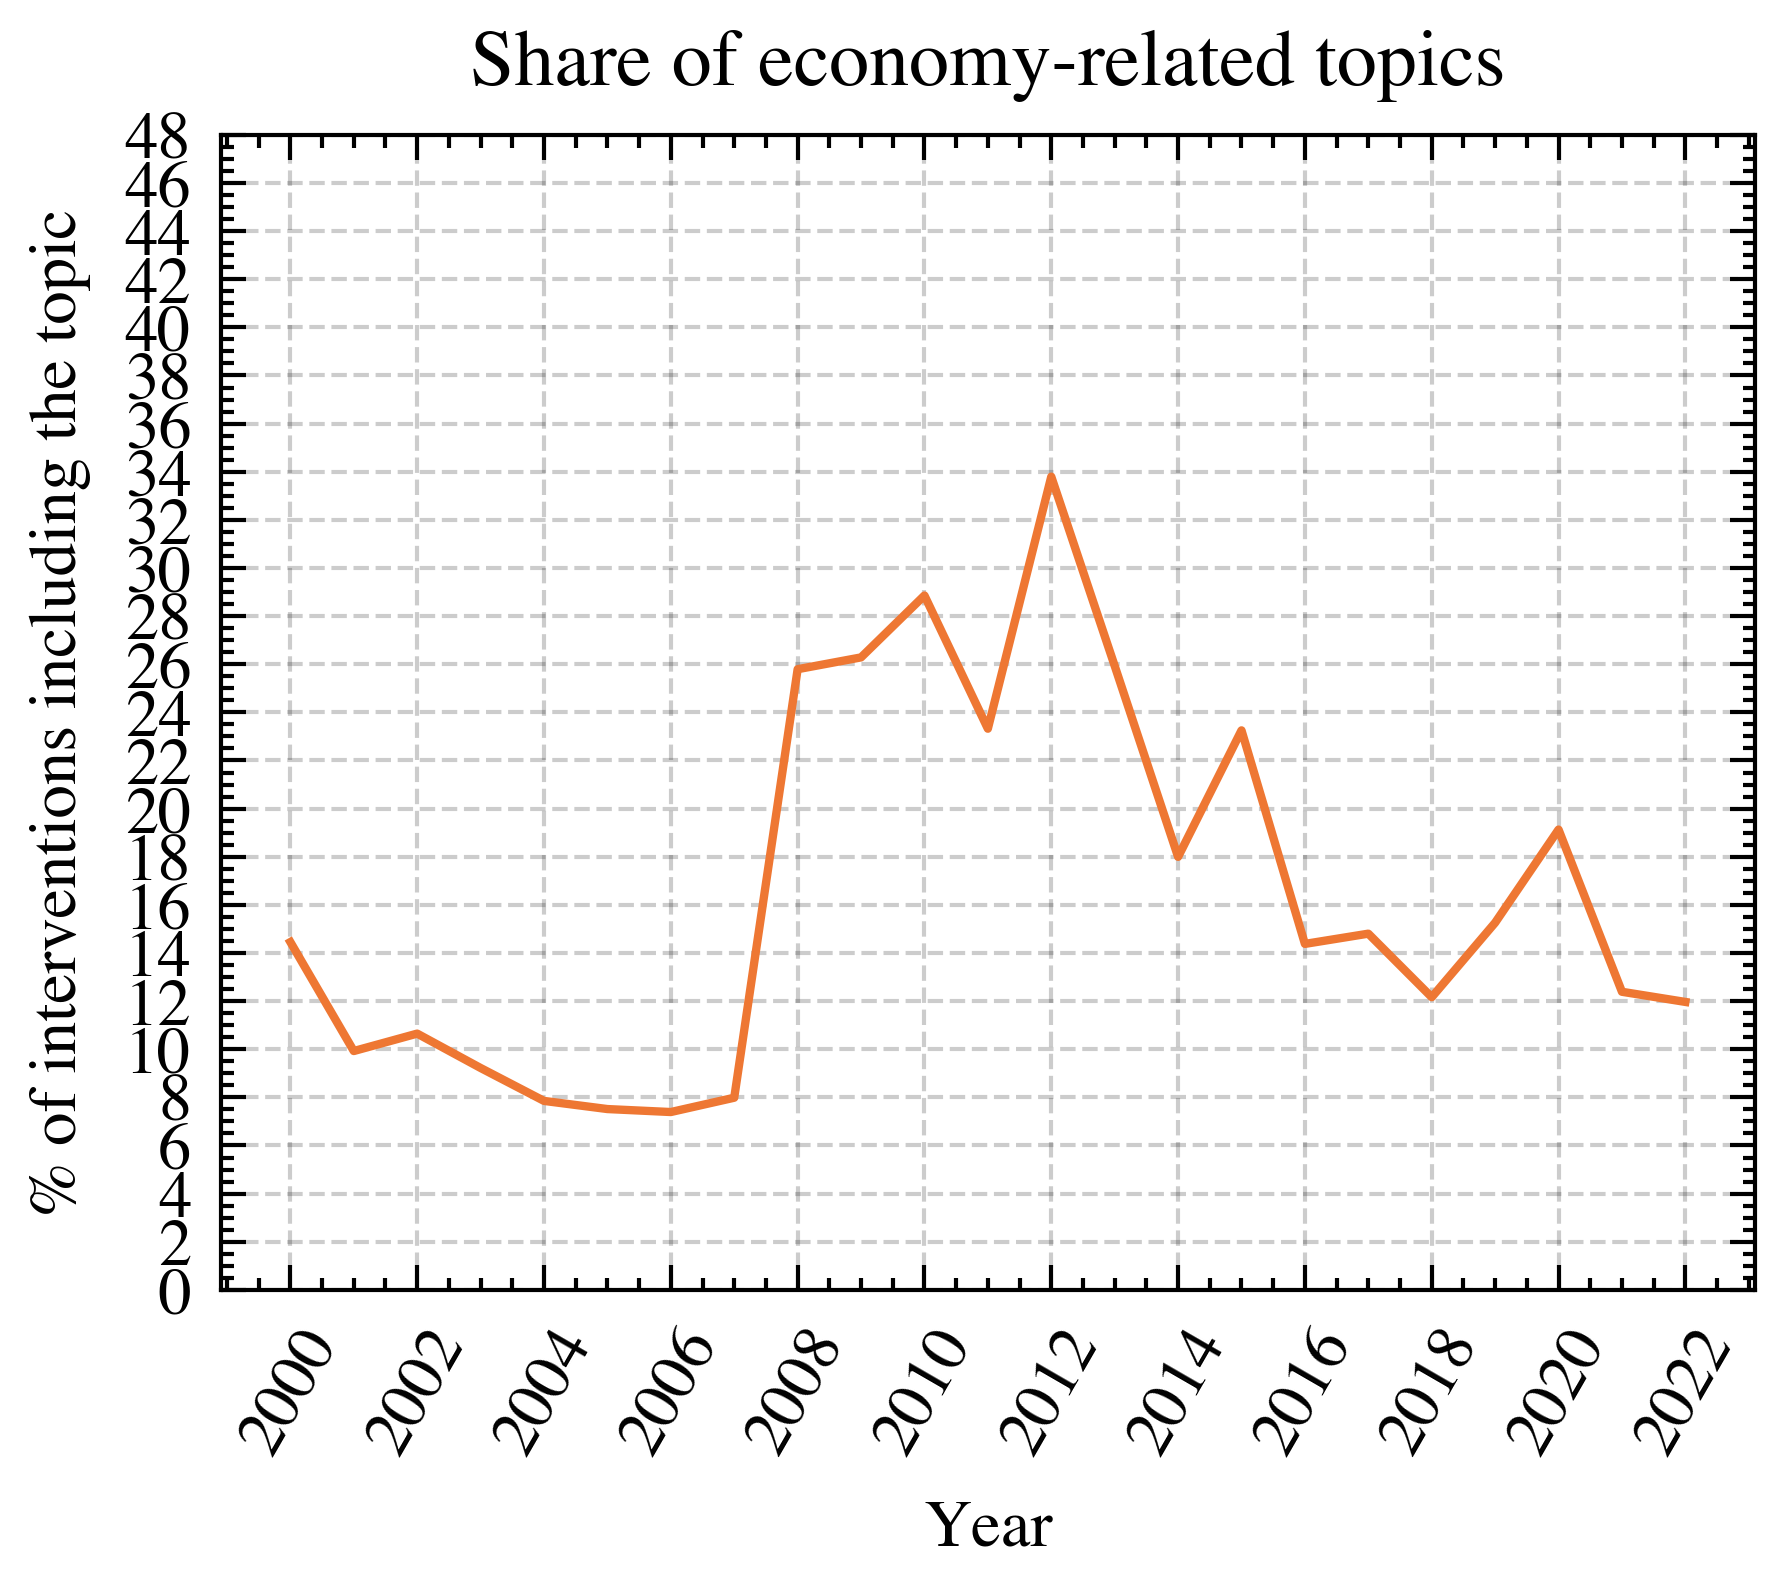

In [335]:
fig, ax = plt.subplots()

ax.plot(perc[:23], label='Economy-related topics')
#ax.plot(unemployment_rate, label='Yearly unemployment rate', lw=.5)

ax.set_xticks(range(2000, 2023, 2))
ax.set_xticklabels(range(2000, 2023, 2), rotation=60)  # , ha='right')

ax.set_yticks(range(0, 50, 2))

ax.grid(alpha=.2)

#ax.annotate(text="11-M terrorist\nattacks", xy=(2004, 15.4), xytext=(2003, 18),fontsize=4, arrowprops=dict(arrowstyle="->", lw=.3), ha='center')


# Titles
ax.set_xlabel('Year')
ax.set_ylabel(f'% of interventions including the topic')
ax.set_title("Share of economy-related topics")
ax.title.set_weight('bold')

#ax.legend(fontsize=4)
